# About the Project

IKUTA Toma 26002300256
This project follows the structure below.
1. Problem Definition
2. Data Collection
3. Data Analysis
4. Model Selection and Fitting
5. Model Validation
6. Forecasting Model Deployment
7. Monitoring Forecasting Model Performance


## Environment
please set up the virtual environemnt with **env.yml**.

You can check the time table from the side bar in the jupyter lab.

# 1. Problem Definition
Car accidents happen constantly around the world, and many variables and situations are involved.

This project focuses on a historical and cross-sectional data in france from 2005 to 2016 and aims to achieve the goals below.

Only quantitative research is to be conducted.

## Project Goal
- **to reveal the variable that contribute to the car accidents the most.**
- **to predict car accidents in france 5 years ahead.**

## Research Questions
- **What variable is the most influential to the car accident.**
- **What model is the best to predict the number of car accidents**

# 2. Data Collection
## Dataset Structure
"Accidents in France from 2005 to 2016" from Kaggle: 

https://www.kaggle.com/datasets/ahmedlahlou/accidents-in-france-from-2005-to-2016?select=caracteristics.csv

caracteristics.csv is to be used that contains 840k data in total.


### Column Description
The table is created based on the description written by the provider.

| **Variable** | **Description** |
|--------------|-----------------|
| `Num_Acc`    | Accident ID |
| `jour`       | Day of the accident |
| `mois`       | Month of the accident |
| `an`         | Year of the accident |
| `hrmn`       | Time of the accident in hour and minutes (format: hhmm) |
| `lum`        | **Lighting conditions:**<br>1 - Full day<br>2 - Twilight or dawn<br>3 - Night without public lighting<br>4 - Night with public lighting not lit<br>5 - Night with public lighting on |
| `dep`        | **Department (INSEE code)**, followed by a 0<br>e.g., 201 = Corse-du-Sud, 202 = Haute-Corse |
| `com`        | **Municipality code** (INSEE 3-digit commune number) |
| `agg`        | **Accident location type:**<br>1 - Out of agglomeration<br>2 - In built-up areas |
| `int`        | **Type of intersection:**<br>1 - Out of intersection<br>2 - Intersection in X<br>3 - Intersection in T<br>4 - Intersection in Y<br>5 - Intersection with more than 4 branches<br>6 - Roundabout<br>7 - Place<br>8 - Level crossing<br>9 - Other intersection |
| `atm`        | **Atmospheric conditions:**<br>1 - Normal<br>2 - Light rain<br>3 - Heavy rain<br>4 - Snow or hail<br>5 - Fog or smoke<br>6 - Strong wind or storm<br>7 - Dazzling weather<br>8 - Cloudy weather<br>9 - Other |
| `col`        | **Type of collision:**<br>1 - Two vehicles - frontal<br>2 - Two vehicles - rear-end<br>3 - Two vehicles - side collision<br>4 - ≥3 vehicles - chain collision<br>5 - ≥3 vehicles - multiple collisions<br>6 - Other collision<br>7 - No collision |
| `adr`        | Postal address (only filled for accidents in built-up areas) |
| `gps`        | **GPS origin code:**<br>M - Métropole<br>A - Antilles (Martinique/Guadeloupe)<br>G - Guyane<br>R - Réunion<br>Y - Mayotte |
| `lat`        | Latitude (in decimal degrees) |
| `long`       | Longitude (in decimal degrees) | 

# 3. Data Analysis

## Pre-Processing
Here is the summary of the pre-processing.
- rename the column names for human readability
- integrate the time information into the new column "timestamp"
- remove variables not to be focused on

### Column Description After Pre-Processing
### Data Amount
839985 rows with 7 columns

| **Variable** | **Description** | **Data Type** | **NaN Count** |
|--------------|-----------------|-----------------|---------------|
| `accident_id`| Accident ID | int64 | 0 |
| `lighting`   | **Lighting conditions:**<br>1 - Full day<br>2 - Twilight or dawn<br>3 - Night without public lighting<br>4 - Night with public lighting not lit<br>5 - Night with public lighting on | int64 | 0 |
| `localisation` | **Accident location type:**<br>1 - Out of agglomeration<br>2 - In built-up areas | int64 | 0 |
| `intersection` | **Type of intersection:**<br>1 - Out of intersection<br>2 - Intersection in X<br>3 - Intersection in T<br>4 - Intersection in Y<br>5 - Intersection with more than 4 branches<br>6 - Roundabout<br>7 - Place<br>8 - Level crossing<br>9 - Other intersection | int64 | 0 |
| `atmospheric_condition` | **Atmospheric conditions:**<br>1 - Normal<br>2 - Light rain<br>3 - Heavy rain<br>4 - Snow or hail<br>5 - Fog or smoke<br>6 - Strong wind or storm<br>7 - Dazzling weather<br>8 - Cloudy weather<br>9 - Other | int64 | 0 |
| `collision_type` | **Type of collision:**<br>1 - Two vehicles - frontal<br>2 - Two vehicles - rear-end<br>3 - Two vehicles - side collision<br>4 - ≥3 vehicles - chain collision<br>5 - ≥3 vehicles - multiple collisions<br>6 - Other collision<br>7 - No collision | int64 | 0 |
| `timestamp`  | Accident time | datetime64[ns] | 0 |





### Import Packages

In [195]:
import calendar
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import adfuller
import statsmodels.api as sm
from statsmodels.tsa.seasonal import seasonal_decompose, STL
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from statsmodels.tools.sm_exceptions import ValueWarning
import statsmodels.api as sm
from scipy.stats import chi2_contingency
from pandas.plotting import lag_plot, autocorrelation_plot
import datetime
import math
import codecs
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.model_selection import train_test_split
import warnings

import os

warnings.simplefilter('ignore', FutureWarning)
warnings.filterwarnings("ignore", category=ValueWarning)

In [196]:
# load a csv
file = 'caracteristics.csv'
with codecs.open(file, 'r', 'utf-8', 'ignore') as file:
    df = pd.read_csv(file, low_memory=False)

# rename column names
rename_col = {'Num_Acc': 'accident_id',
              'an': 'year', 
              'mois': 'month', 
              'jour':'day',
              'hrmn':'time', 
              'lum':'lighting', 
              'dep':'NSEE_code', 
              'com':'municipality',
              'agg':'localisation',
              'int':'intersection', 
              'atm':'atmospheric_condition', 
              'col':'collision_type', 
              'adr':'postal_address' }
df = df.rename(columns=rename_col)

#drop unnecessary columns
df = df.drop(['municipality', 
              'postal_address', 
              'gps', 
              'lat', 
              'long', 
              'NSEE_code'],
             axis=1)

time_col = ['year', 'month', 'day', 'time']

for col, w in zip(time_col, [2,2,2,4]):
    df[col] = df[col].astype(str).str.zfill(w)


df['timestamp'] = df[time_col].agg(''.join, axis=1).pipe(pd.to_datetime, format="%y%m%d%H%M")

#drop time columns other than timestamp
df = df.drop(time_col ,axis=1)

# change data types : -1 => NaN
df['atmospheric_condition'] = df['atmospheric_condition'].fillna(-1).astype(int)
df['collision_type'] = df['collision_type'].fillna(-1).astype(int)
df.head()

accident_id  lighting  localisation  intersection  atmospheric_condition  \
0  201600000001         1             2             1                      8   
1  201600000002         1             2             6                      1   
2  201600000003         1             1             1                      1   
3  201600000004         2             2             1                      7   
4  201600000005         1             2             3                      1   

   collision_type           timestamp  
0               3 2016-02-01 14:45:00  
1               6 2016-03-16 18:00:00  
2               6 2016-07-13 19:00:00  
3               3 2016-08-15 19:30:00  
4               3 2016-12-23 11:00:00

In [197]:
print("--Data Amount--")
print(df.shape[0], "rows")
print("    ", df.shape[1], "columns")
print("\n--Data type--")
print(df.dtypes, "\n")
print("--The number of Nan values--")
print(df.isna().sum())

--Data Amount--
839985 rows
     7 columns

--Data type--
accident_id                       int64
lighting                          int64
localisation                      int64
intersection                      int64
atmospheric_condition             int64
collision_type                    int64
timestamp                datetime64[ns]
dtype: object 

--The number of Nan values--
accident_id              0
lighting                 0
localisation             0
intersection             0
atmospheric_condition    0
collision_type           0
timestamp                0
dtype: int64


### Define Lists Correspond to Numbers in Columns
Current data table has conditions as interger. Therefore, look-up table is created here.

In [140]:

            
list_lighting =['Full day', 
              'Twilight or dawn', 
              'Night without public lighting', 
              'Night with public lighting not lit', 
              'Night with public lighting on']

list_localisation = ['Out of agglomeration',
                   'built-up areas']

list_intersection = ['Out of intersection', 
                   'X intersection', 
                   'T intersection', 
                   'Y intersection']

list_atmospheric_condition = ['Normal', 
                            'Light rain',
                            'Snow - hail',
                            'Fog - smoke', 
                            'Strong wind - storm',
                            'Dazzling weather',
                            'Cloudy weather',
                            'Other']

list_collision_type = ['Two vehicles - frontal', 
                     'Two vehicles - from the rear',
                    'Two vehicles - by the side',
                    'Three vehicles and more - in chain',
                    'Three or more vehicles - multiple collisions',
                    'Other collision',
                     'Without collision']


## Visualize Time Series of Accidents
Visualize the daily number of accidents in France from 2005 to 2016.

The x-axis represents time (by day), and the y-axis represents the number of accidents per day.

The plot appears to show a seasonal pattern and a slightly decreasing trend.

Additionally, there do not seem to be any anomalous data points.

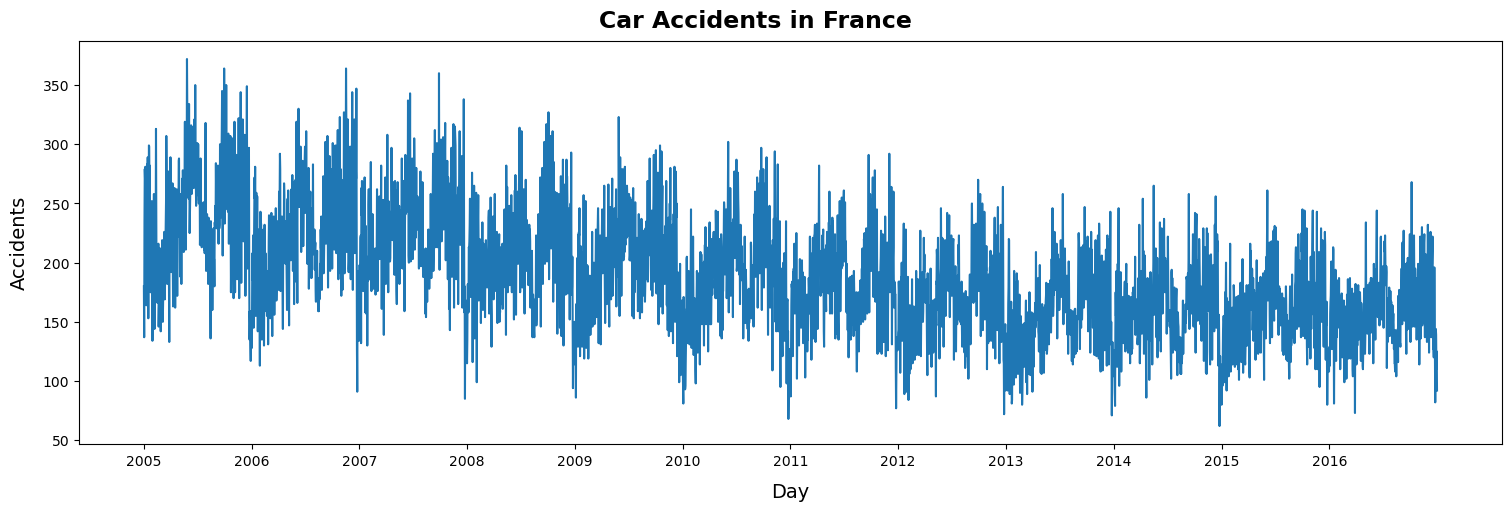

In [141]:
df_time = df[['accident_id', 'timestamp']].set_index('timestamp').rename_axis(None, axis=0)

#count accidents in each day
df_ymd = df_time.groupby([df_time.index.year, df_time.index.month,df_time.index.day]).size()
df_ymd.name = "accidents"
df_ymd = df_ymd.to_frame()
df_ymd.index = pd.to_datetime(df_ymd.index.map(lambda x: f"{x[0]}-{x[1]:02d}-{x[2]:02d}"))

# Create a graph of df_yThemd
fig, ax = plt.subplots(1, 1, layout='constrained', figsize=(15, 5))

fontsize = 17

fig.suptitle("Car Accidents in France", fontsize=fontsize, fontweight='bold')

ax.plot(df_ymd.index, df_ymd['accidents'])
ax.set_xlabel('Day', fontsize=fontsize-3, labelpad=10)  # Increase distance from axis
ax.set_ylabel('Accidents', fontsize=fontsize-3, labelpad=10)
ax.set_xticks(pd.date_range(start=df_ymd.index.min(), end=df_ymd.index.max(), freq='YS'))
ax.xaxis.set_major_formatter(plt.matplotlib.dates.DateFormatter('%Y'))

### ADF Test to Determine If It's Stationary
Since the pattern in the plot above is not clearly visible, the Augmented Dickey–Fuller (ADF) test was conducted to check for stationarity.

The p-value is greater than 0.05, so the null hypothesis cannot be rejected.

Therefore, the time series appears to be non-stationary.

In [142]:
df_ym = df_ymd.groupby([df_ymd.index.year, df_ymd.index.month]).sum()
df_ym.index = pd.to_datetime(df_ym.index.map(lambda x: f"{x[0]}-{x[1]:02d}"))

adf_result = adfuller(df_ym["accidents"])
alpha = 0.05
p_value = adf_result[1]
if p_value < alpha:
    print("p-value", p_value, "\n")
    print("reject the null hypothesis")
    print("it seems to be stationary")
else:
    print("p-value", p_value)
    print("fail to reject the null hypothesis")
    print("it doesn't seem to be stationary")
    

p-value 0.6165290298413618
fail to reject the null hypothesis
it doesn't seem to be stationary


### Box-and-Whisker Plot, Heatmap, ACF, PACF, and Seasonal Plots
Visualization is performed to discover the trend, seasonal pattern, and cyclic pattern.

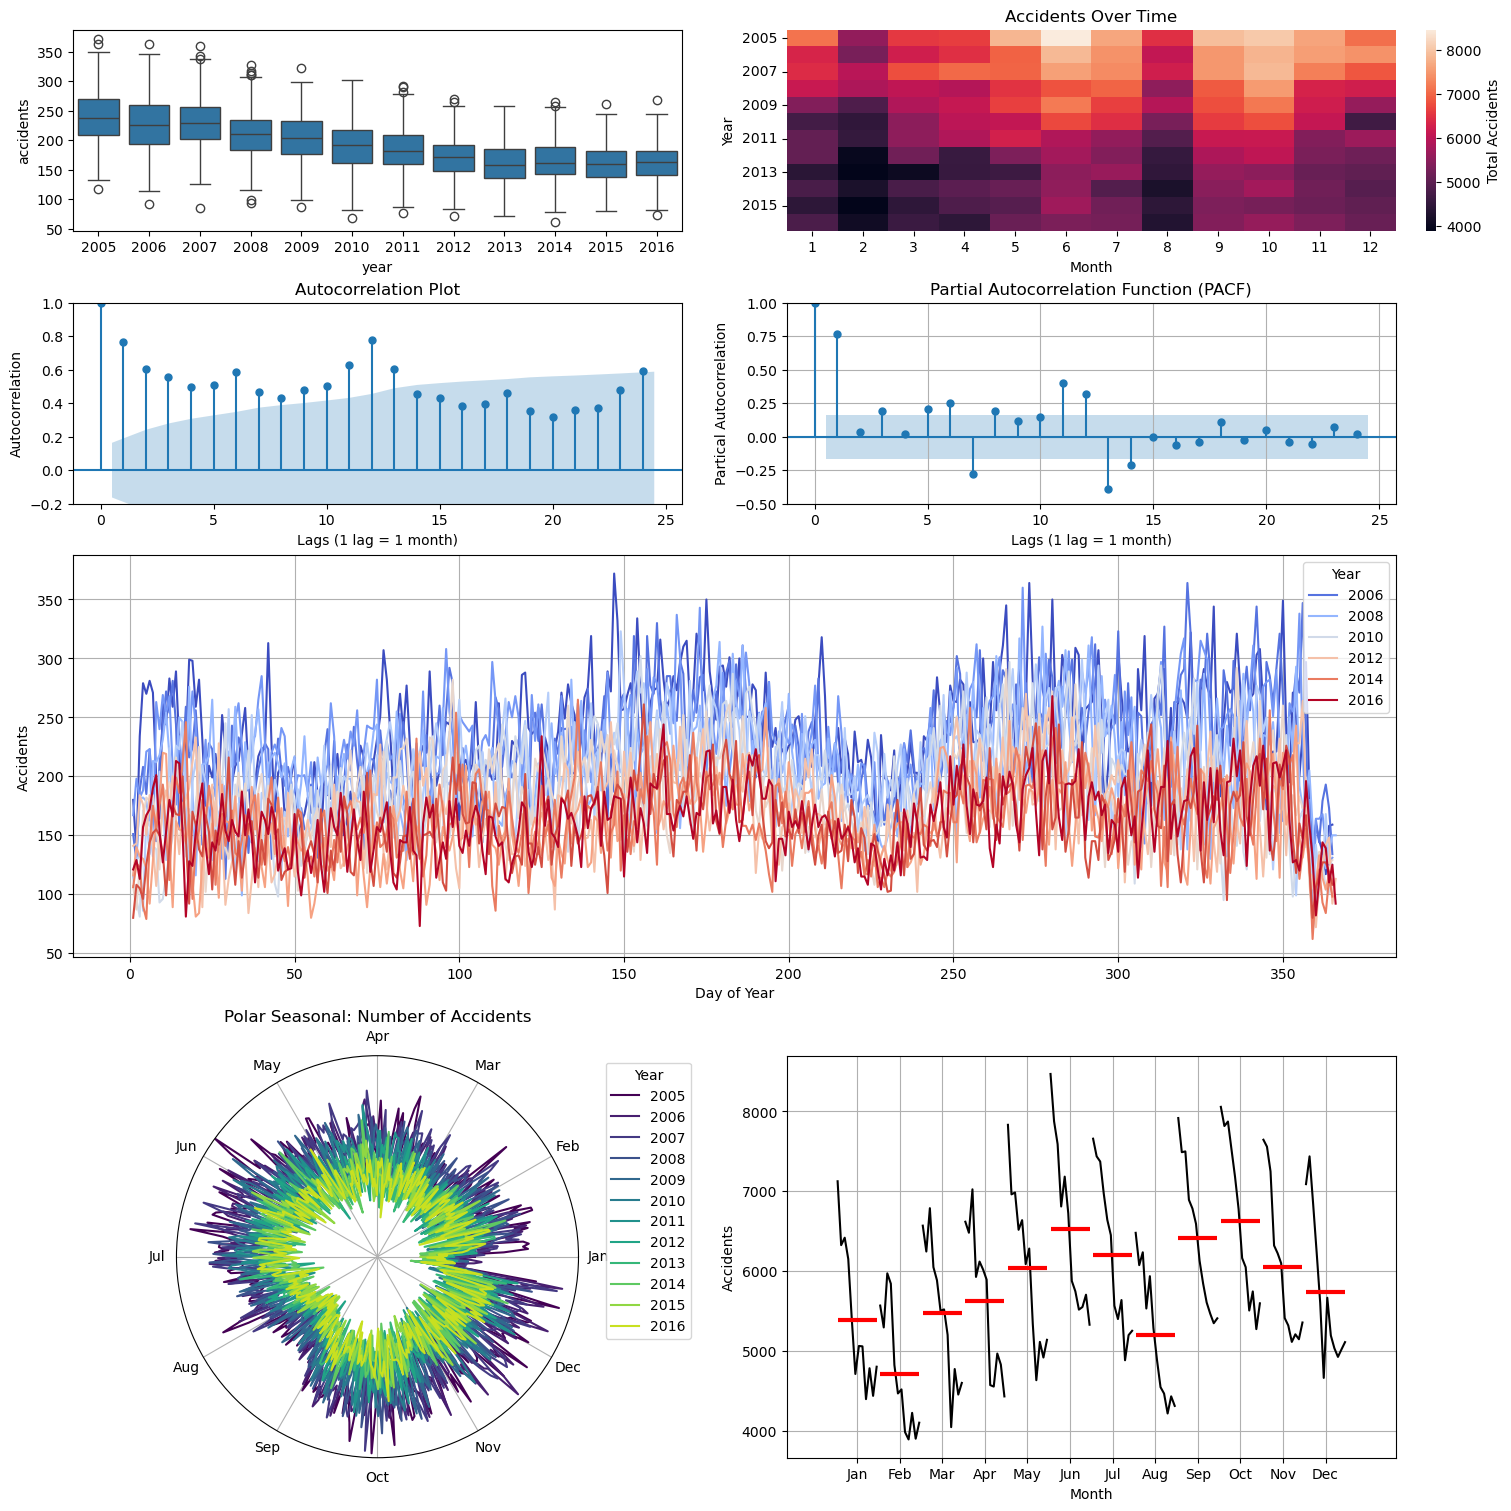

In [143]:
copy_df_ymd = df_ymd.copy()
copy_df_ymd["year"] = df_ymd.index.year
copy_df_ymd["month"] = df_ymd.index.month
copy_df_ymd["day"] = df_ymd.index.dayofyear

fig = plt.figure(constrained_layout=True, figsize=(15, 15))
gs = gridspec.GridSpec(6, 2, figure=fig)
ax1 = fig.add_subplot(gs[0, 0])
ax2 = fig.add_subplot(gs[0, 1])
ax3 = fig.add_subplot(gs[1, 0])
ax4 = fig.add_subplot(gs[1, 1])
ax5 = fig.add_subplot(gs[2:4, 0:2])
ax6 = fig.add_subplot(gs[4:6, 0],polar=True)
ax7 = fig.add_subplot(gs[4:6, 1])

sns.boxplot(data=copy_df_ymd, x="year", y="accidents", ax=ax1);

# heat map
accidents_month_year = copy_df_ymd.groupby(["year", "month"]).sum()
accidents_month_year = accidents_month_year.reset_index().pivot(index="year", columns="month", values="accidents")

sns.heatmap(accidents_month_year, cbar_kws={"label": "Total Accidents"},ax=ax2)
ax2.set_title("Accidents Over Time")
ax2.set_xlabel("Month")
for label in ax2.get_yticklabels():
    label.set_rotation(0)
ax2.set_ylabel("Year");

plot_acf(df_ym['accidents'], lags=24, ax=ax3) 
ax3.set_xlabel('Lags (1 lag = 1 month)')
ax3.set_ylabel('Autocorrelation')
ax3.set_title('Autocorrelation Plot')
ax3.set_ylim([-0.2,1])

plot_pacf(df_ym['accidents'], lags=24, ax=ax4)  # Change lags according to your data
ax4.set_xlabel('Lags (1 lag = 1 month)')
ax4.set_ylabel('Partical Autocorrelation')
ax4.set_title('Partial Autocorrelation Function (PACF)')
ax4.grid(True)
ax4.set_ylim([-0.5,1])

sns.lineplot(data=copy_df_ymd, x=copy_df_ymd['day'], y='accidents', hue='year', palette='coolwarm', ax=ax5)
ax5.set(xlabel='Day of Year', ylabel='Accidents')
ax5.grid()
ax5.legend(title='Year')


cm = plt.get_cmap('viridis')
for (i, p) in enumerate(copy_df_ymd['year'].unique()):
    color = cm(i / len(copy_df_ymd['year'].unique()))
    values = copy_df_ymd[copy_df_ymd['year'] == p]['accidents']
    angles = np.linspace(0, 2 * np.pi, len(values), endpoint=False)
    values = np.concatenate((values, [values[0]]))  # Close the plot
    angles = np.concatenate((angles, [angles[0]]))  # Close the plot
    ax6.plot(angles, values, label=str(p), color=color)

month_angles = np.linspace(0, 2 * np.pi, 12, endpoint=False)
month_names = [calendar.month_abbr[i+1] for i in range(12)]
ax6.set_xticks(month_angles)
ax6.set_xticklabels(month_names)
ax6.set_rlabel_position(90)
ax6.set_rticks([])
ax6.set_rmax(copy_df_ymd['accidents'].max())
ax6.set_title('Polar Seasonal: Number of Accidents')
ax6.legend(title='Year', bbox_to_anchor=(1.05, 1), loc='upper left')

sm.graphics.tsa.month_plot(df_ym['accidents'], ax=ax7)
ax7.set(xlabel='Month', ylabel='Accidents')
ax7.grid()

#### Summary of the plots
- A decreasing trend appears.
- A sinusoidal seasonal pattern appears.
- The previous month has a strong correlation with the current month’s data.

---
  
#### The Box-and-Whisker Plot tells
- The interquartile ranges and the differences between max and min values do not vary much by year.
- Median values show a decreasing trend.

---

#### The Heatmap conveys
- A decreasing trend is evident as the lower cells get darker.

- There are decreasing seasonal patterns in February and August, and increasing seasonal patterns in June and October, indicated by darker or lighter colors compared to adjacent cells.

---

#### The Autocorrelation Plot reveals
- A wave-like seasonal pattern.

---

#### The Partial Autocorrelation Plot discovers
- Lag 1 data has a strong correlation with the current value.

---

#### The Seasonal Line Plot finds
- A decreasing trend by year.
- Decreasing seasonal patterns between days 200-250 and days 350-365.

---

#### The Polar Seasonal Plot discovers
- Decreasing seasonal patterns between August and September, and at the end of the year.

---

#### The Seasonal Subseries Plot shows
- February and August have fewer accidents.

### Classical Decomposition and STL Decomposition
The visualizations above help identify the trend and pattern.

Therefore, decomposition is performed to extract them clearly.

Two methods, classical decomposition and STL decomposition, are used to ensure robustness.

Both plots show similar results:
- A decreasing trend
- A sinusoidal seasonal pattern

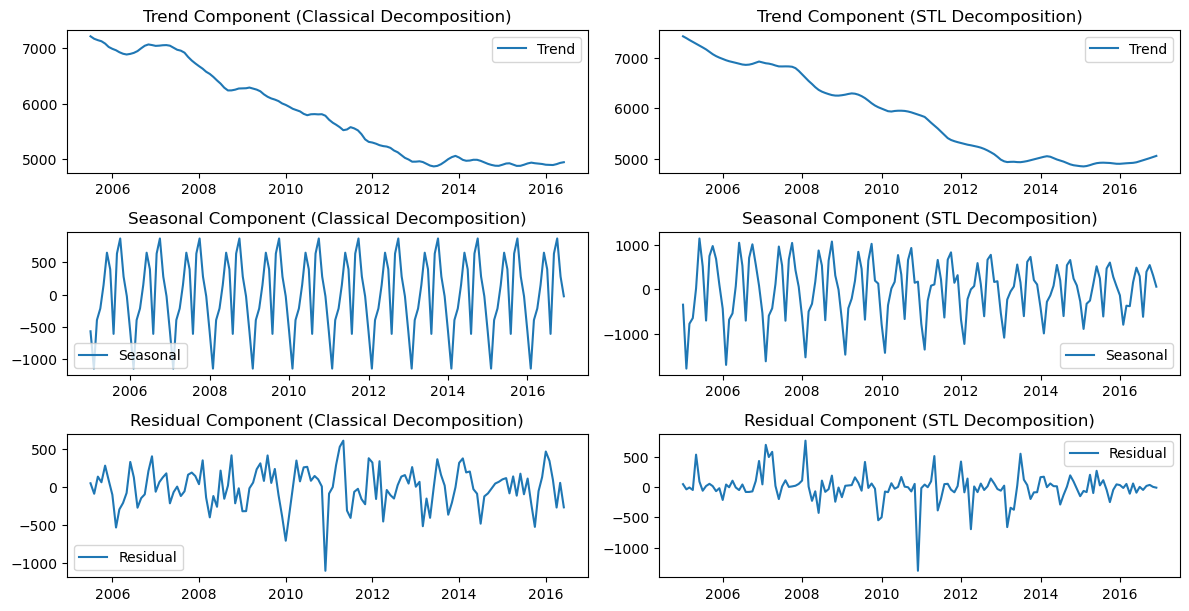

In [144]:
classical_dcmp = seasonal_decompose(df_ym, model='additive', period=12)

t_v = 12 + 1 # 12 month + 1 (to be an odd number)
p_v = 12 # seasonal change by 3 months

stl=STL(df_ym['accidents'], period=p_v, trend=t_v, robust=True)
stl_result = stl.fit()

plt.figure(figsize=(12, 8))

# Classical Decomposition Components
plt.subplot(4, 2, 1)
plt.plot(df_ym.index, classical_dcmp.trend, label='Trend')
plt.title('Trend Component (Classical Decomposition)')
plt.legend()

plt.subplot(4, 2, 3)
plt.plot(df_ym.index, classical_dcmp.seasonal, label='Seasonal')
plt.title('Seasonal Component (Classical Decomposition)')
plt.legend()

plt.subplot(4, 2, 5)
plt.plot(df_ym.index, classical_dcmp.resid, label='Residual')
plt.title('Residual Component (Classical Decomposition)')
plt.legend()

# STL Decomposition Components
plt.subplot(4, 2, 2)
plt.plot(df_ym.index, stl_result.trend, label='Trend')
plt.title('Trend Component (STL Decomposition)')
plt.legend()

plt.subplot(4, 2, 4)
plt.plot(df_ym.index, stl_result.seasonal, label='Seasonal')
plt.title('Seasonal Component (STL Decomposition)')
plt.legend()

plt.subplot(4, 2, 6)
plt.plot(df_ym.index, stl_result.resid, label='Residual')
plt.title('Residual Component (STL Decomposition)')
plt.legend()

plt.tight_layout()

### Test If the Residuals are White Noises With Ljung-Box Test
The Ljung-Box test is conducted to check whether the two decomposition methods capture the pattern.

The null hypothesis is accepted for both methods, indicating that the pattern is captured.

In [145]:
def is_white_noise(dcm, resid):
    lag = 10
    ljungbox_result = sm.stats.acorr_ljungbox(resid, lags=[lag], return_df=True)
    p_value = ljungbox_result["lb_pvalue"][lag]
    print("-------About {}-------".format(dcm))
    if p_value < 0.05:
        print("Failed to reject the null hypothesis")
        print("the residuals are not likely independent")
    else:
        print("Accept the null hypothesis")
        print("the residuals are likely independent")

    print("\n")

is_white_noise("Classical decomposition", classical_dcmp.resid)
is_white_noise("STL decomposition", stl_result.resid)

-------About Classical decomposition-------
Accept the null hypothesis
the residuals are likely independent


-------About STL decomposition-------
Accept the null hypothesis
the residuals are likely independent




## Variable Analysis

Variable analysis is conducted to discover what variables are the most influential (One of the major goals in this project)

### Review what variables are present

- **lighting**: Indicates the lighting conditions.  
  Example: `Full day`

- **localisation**: Specifies the type of location.  
  Example: `Out of agglomeration`

- **intersection**: Describes the type of intersection.  
  Example: `Intersection in X`

- **atmospheric_condition**: Conveys the weather conditions.  
  Example: `Heavy Rain`

- **collision_type**: Shows the type of collision.  
  Example: `Two vehicles – rear-end`

- **timestamp**: Indicates the date and time.  
  Example: `2016-02-01 14:45:00`

In [146]:
df.head()

accident_id  lighting  localisation  intersection  atmospheric_condition  \
0  201600000001         1             2             1                      8   
1  201600000002         1             2             6                      1   
2  201600000003         1             1             1                      1   
3  201600000004         2             2             1                      7   
4  201600000005         1             2             3                      1   

   collision_type           timestamp  
0               3 2016-02-01 14:45:00  
1               6 2016-03-16 18:00:00  
2               6 2016-07-13 19:00:00  
3               3 2016-08-15 19:30:00  
4               3 2016-12-23 11:00:00

### Aggregate and Visualize Time Series for Each Variable by Mean, Sum, and Mode

Data is aggregated by mean, sum, and mode to examine their patterns. It may help find plots that are easy to capture.

However, My assumption is that since variables are nominal categorical numbers, these timeseries plots are not appropriate. 

In [147]:
def ymdh_var_plt(yearly, monthly, daily, hourly, title,condition_list):

    fig, ax = plt.subplots(5,4,figsize=(20, 20), layout='constrained')
    fs = 15
    lp  = 10
    colors = plt.get_cmap('Set2').colors
    fig.suptitle(title, fontsize=fs, fontweight='bold')
    for i,cnd in enumerate(condition_list):
        ax[i][0].plot(hourly.index, hourly[cnd], marker='o', color = colors[i])
        ax[i][0].set_xlabel('Hourly', fontsize=fs-3, labelpad=lp)
        ax[i][0].set_ylabel(cnd.capitalize(), fontsize=fs-3, labelpad=lp)
        ax[i][0].set_xticks(pd.date_range(start=df_copy.index.min(), end=df_copy.index.max(), freq='YS'))
        ax[i][0].xaxis.set_major_formatter(plt.matplotlib.dates.DateFormatter('%Y'))
    
        ax[i][1].plot(daily.index, daily[cnd], marker='o', color = colors[i])
        ax[i][1].set_xlabel('Daily', fontsize=fs-3, labelpad=lp)
        ax[i][1].set_ylabel(cnd.capitalize(), fontsize=fs-3, labelpad=lp)
        ax[i][1].set_xticks(pd.date_range(start=df_copy.index.min(), end=df_copy.index.max(), freq='YS'))
        ax[i][1].xaxis.set_major_formatter(plt.matplotlib.dates.DateFormatter('%Y'))
    
        ax[i][2].plot(monthly.index, monthly[cnd], marker='o', color = colors[i])
        ax[i][2].set_xlabel('Month', fontsize=fs-3, labelpad=lp)
        ax[i][2].set_ylabel(cnd.capitalize(), fontsize=fs-3, labelpad=lp)
        ax[i][2].set_xticks(pd.date_range(start=df_copy.index.min(), end=df_copy.index.max(), freq='YS'))
        ax[i][2].xaxis.set_major_formatter(plt.matplotlib.dates.DateFormatter('%Y'))
        
        ax[i][3].plot(yearly.index, yearly[cnd], marker='o', color = colors[i])
        ax[i][3].set_xlabel('Year', fontsize=fs-3, labelpad=lp)
        ax[i][3].set_ylabel(cnd.capitalize(), fontsize=fs-3, labelpad=lp)
        ax[i][3].set_xticks(pd.date_range(start=df_copy.index.min(), end=df_copy.index.max(), freq='YS'))
        ax[i][3].xaxis.set_major_formatter(plt.matplotlib.dates.DateFormatter('%Y'))
    
    for row in ax:
        for axis in row:
            axis.tick_params(axis='x', rotation=90)

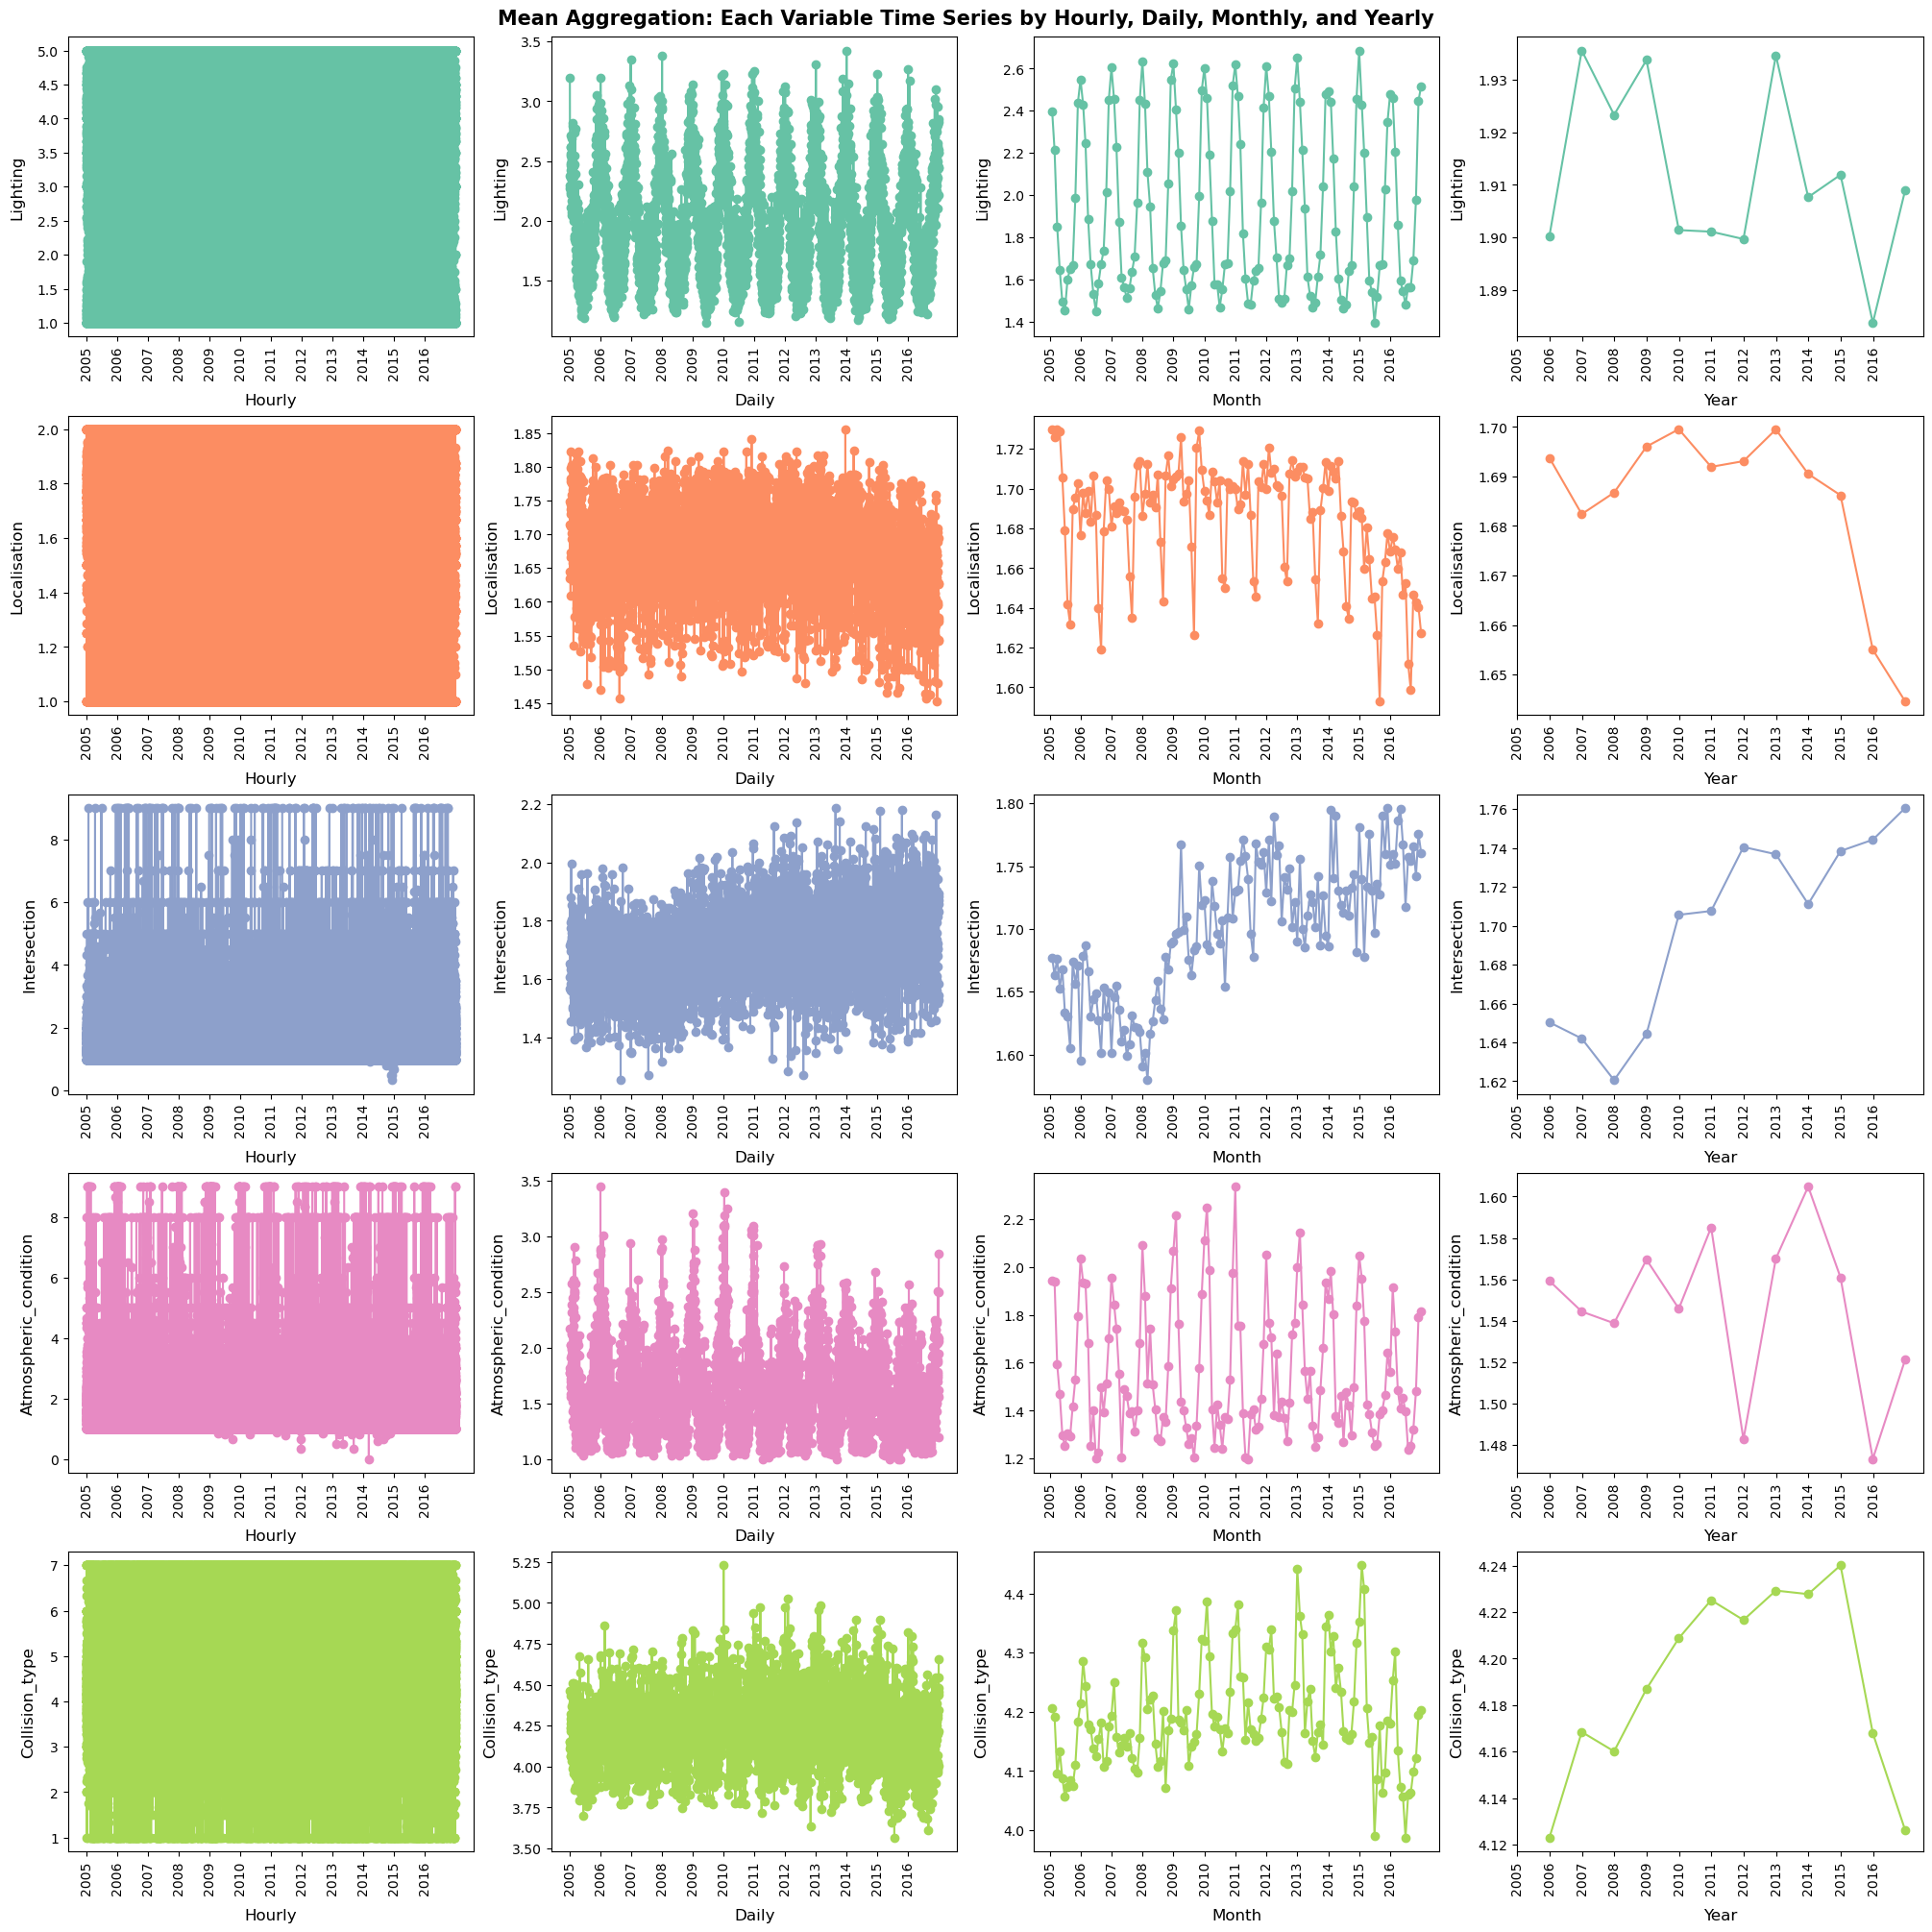

In [148]:
df_copy = df.copy()
df_copy.set_index('timestamp', inplace=True)

condition_list = ["lighting", "localisation", "intersection", "atmospheric_condition", "collision_type"]
len_l = len(condition_list)

daily = df_copy.resample('D').mean()
hourly = df_copy.resample('H').mean()
monthly = df_copy.resample('M').mean()
yearly = df_copy.resample('Y').mean()
ymdh_var_plt(yearly,monthly,daily,hourly,"Mean Aggregation: Each Variable Time Series by Hourly, Daily, Monthly, and Yearly",condition_list)

#### Insight of **Mean** Aggregation

| Variable              | Pattern              | Trend                                                   |
|:----------------------|:---------------------|:---------------------------------------------------------|
| lighting              | Seasonal             | No clear trend                                           |
| localisation          | Unclear seasonal     | Decrement                                                |
| intersection          | None                 | Increment                                                |
| atmospheric_condition | Seasonal             | No trend                                                 |
| collision_type        | Seasonal             | Increment until 2015, then decrement                     |


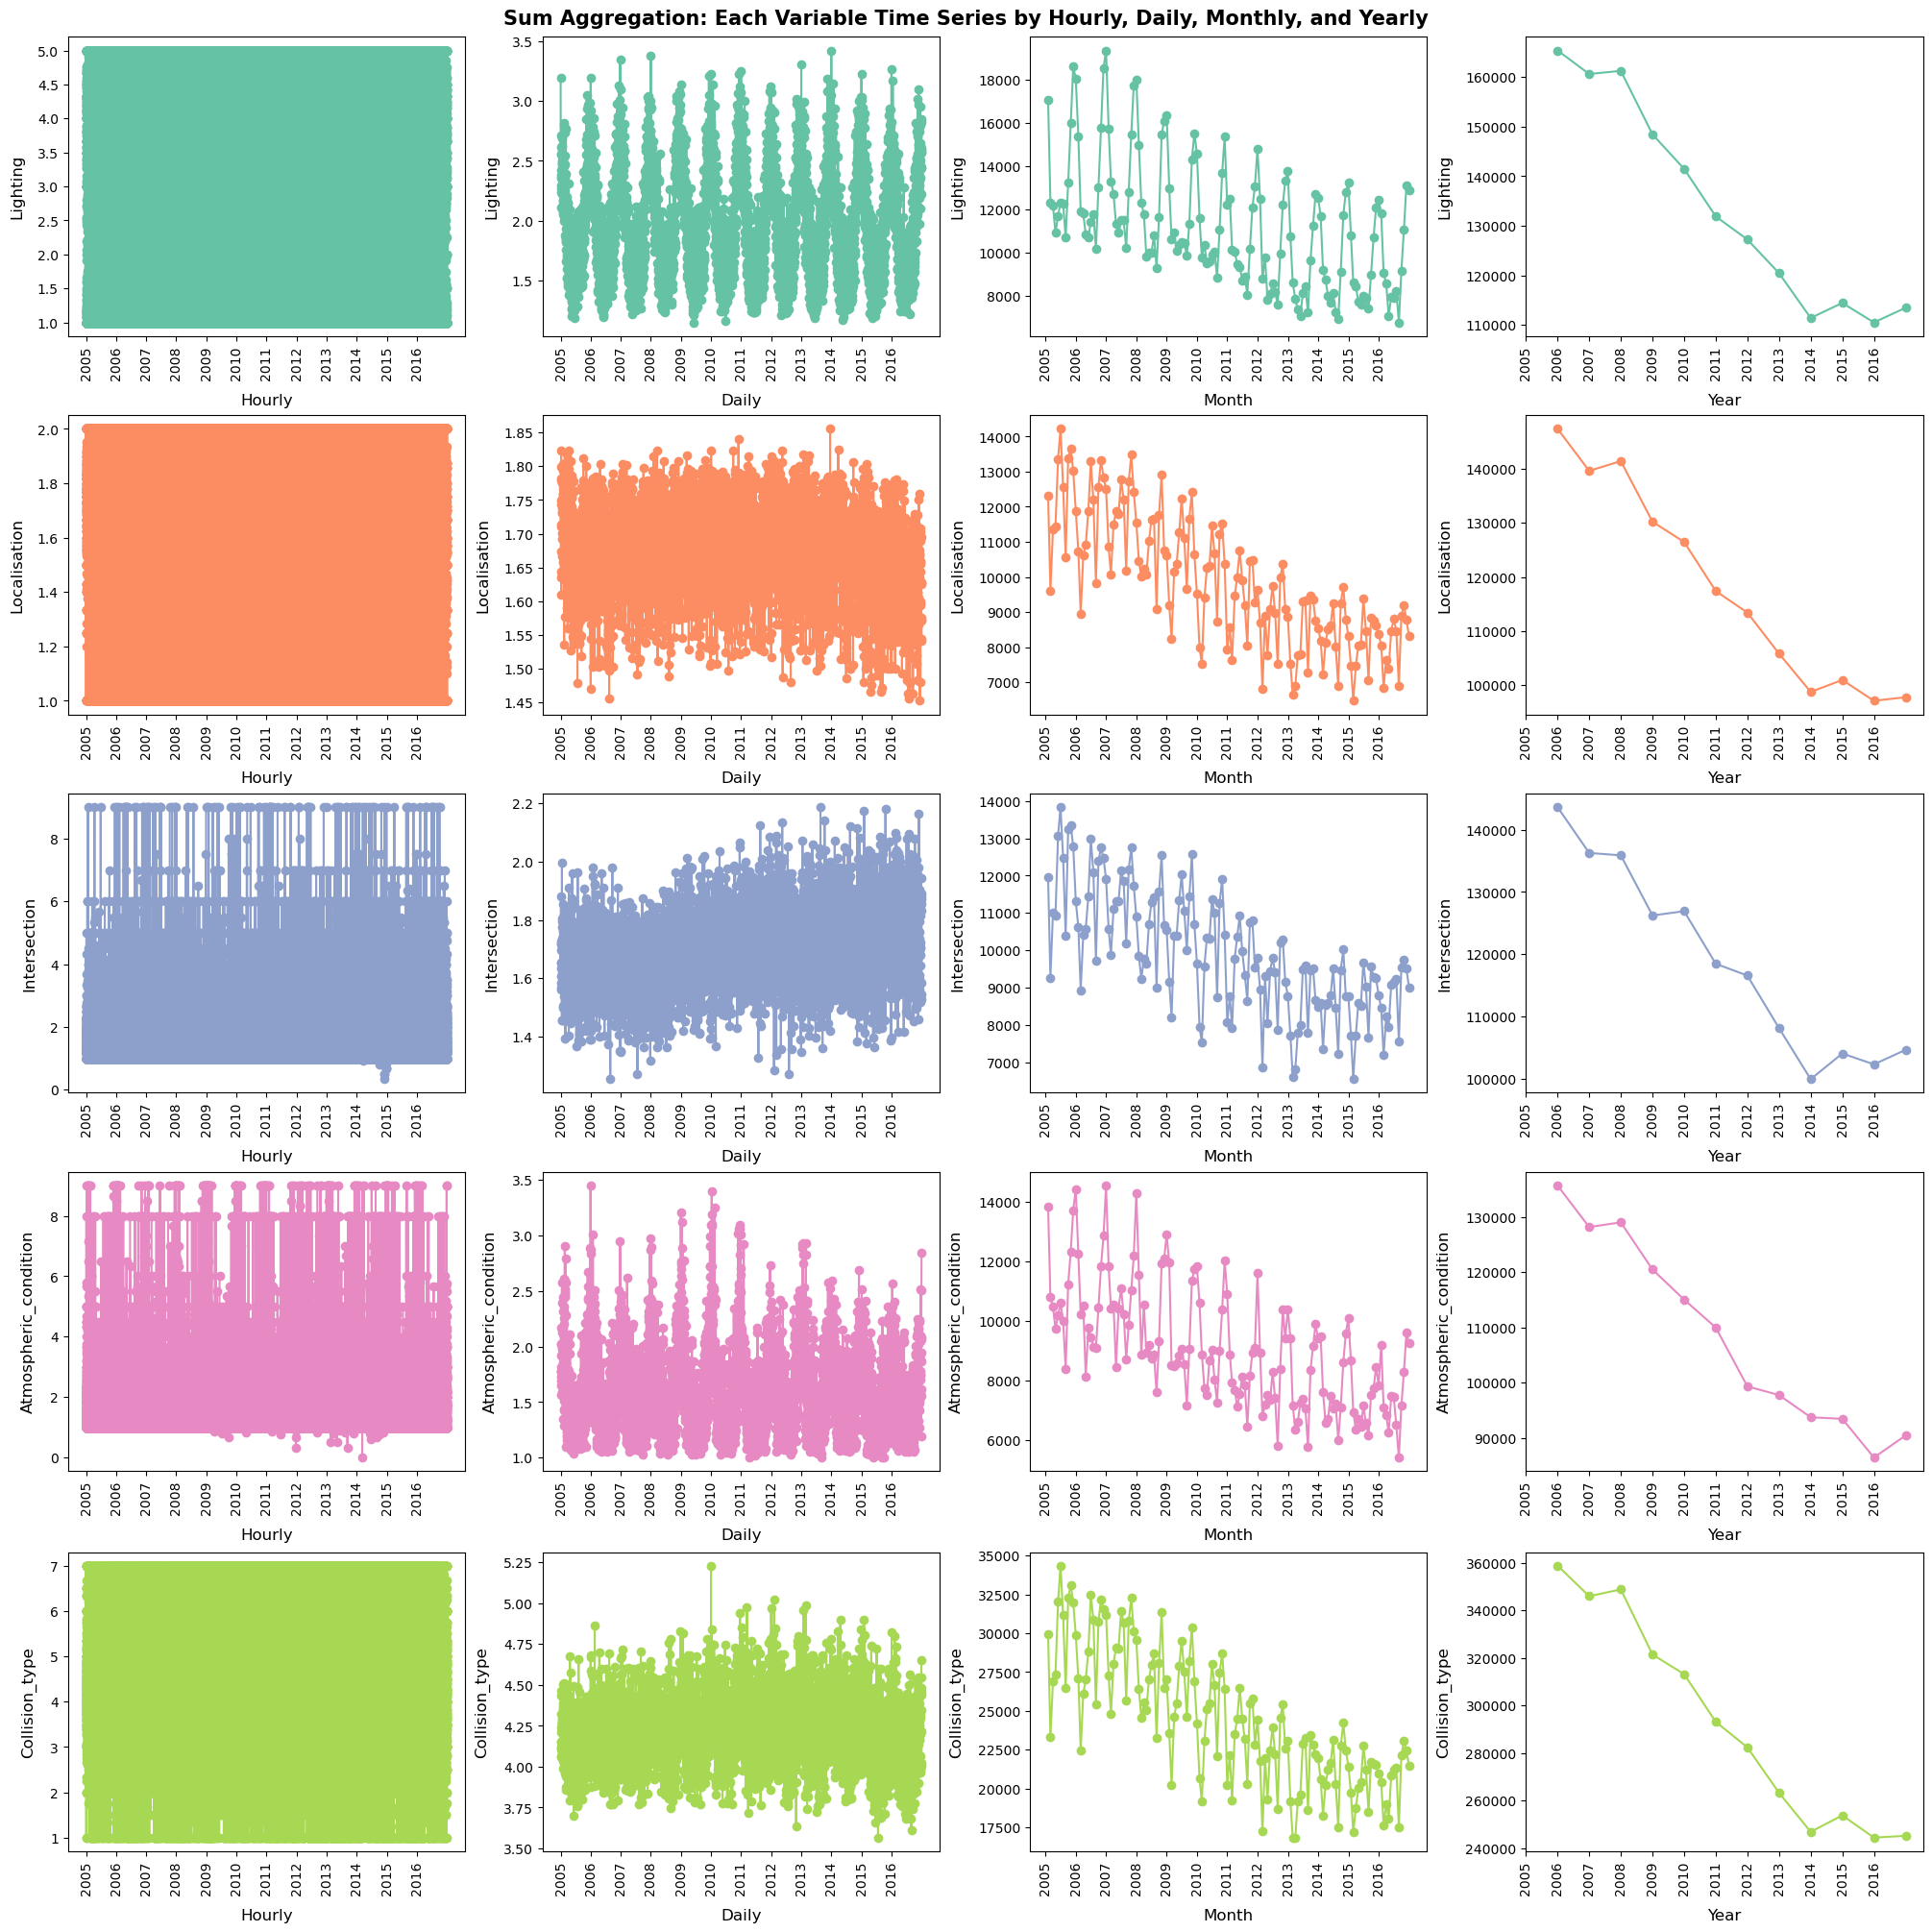

In [149]:
df_copy = df.copy()
df_copy.set_index('timestamp', inplace=True)

condition_list = ["lighting", "localisation", "intersection", "atmospheric_condition", "collision_type"]
len_l = len(condition_list)

monthly = df_copy.resample('M').sum()
yearly = df_copy.resample('Y').sum()

ymdh_var_plt(yearly,monthly,daily,hourly,"Sum Aggregation: Each Variable Time Series by Hourly, Daily, Monthly, and Yearly",condition_list)


#### Insight of **Sum** Aggregation

| Variable              | Pattern  | Trend      |
|:----------------------|:---------|:-----------|
| lighting              | Seasonal | Decrement  |
| localisation          | Seasonal | Decrement  |
| intersection          | Seasonal | Decrement  |
| atmospheric_condition | Seasonal | Decrement  |
| collision_type        | Seasonal | Decrement  |

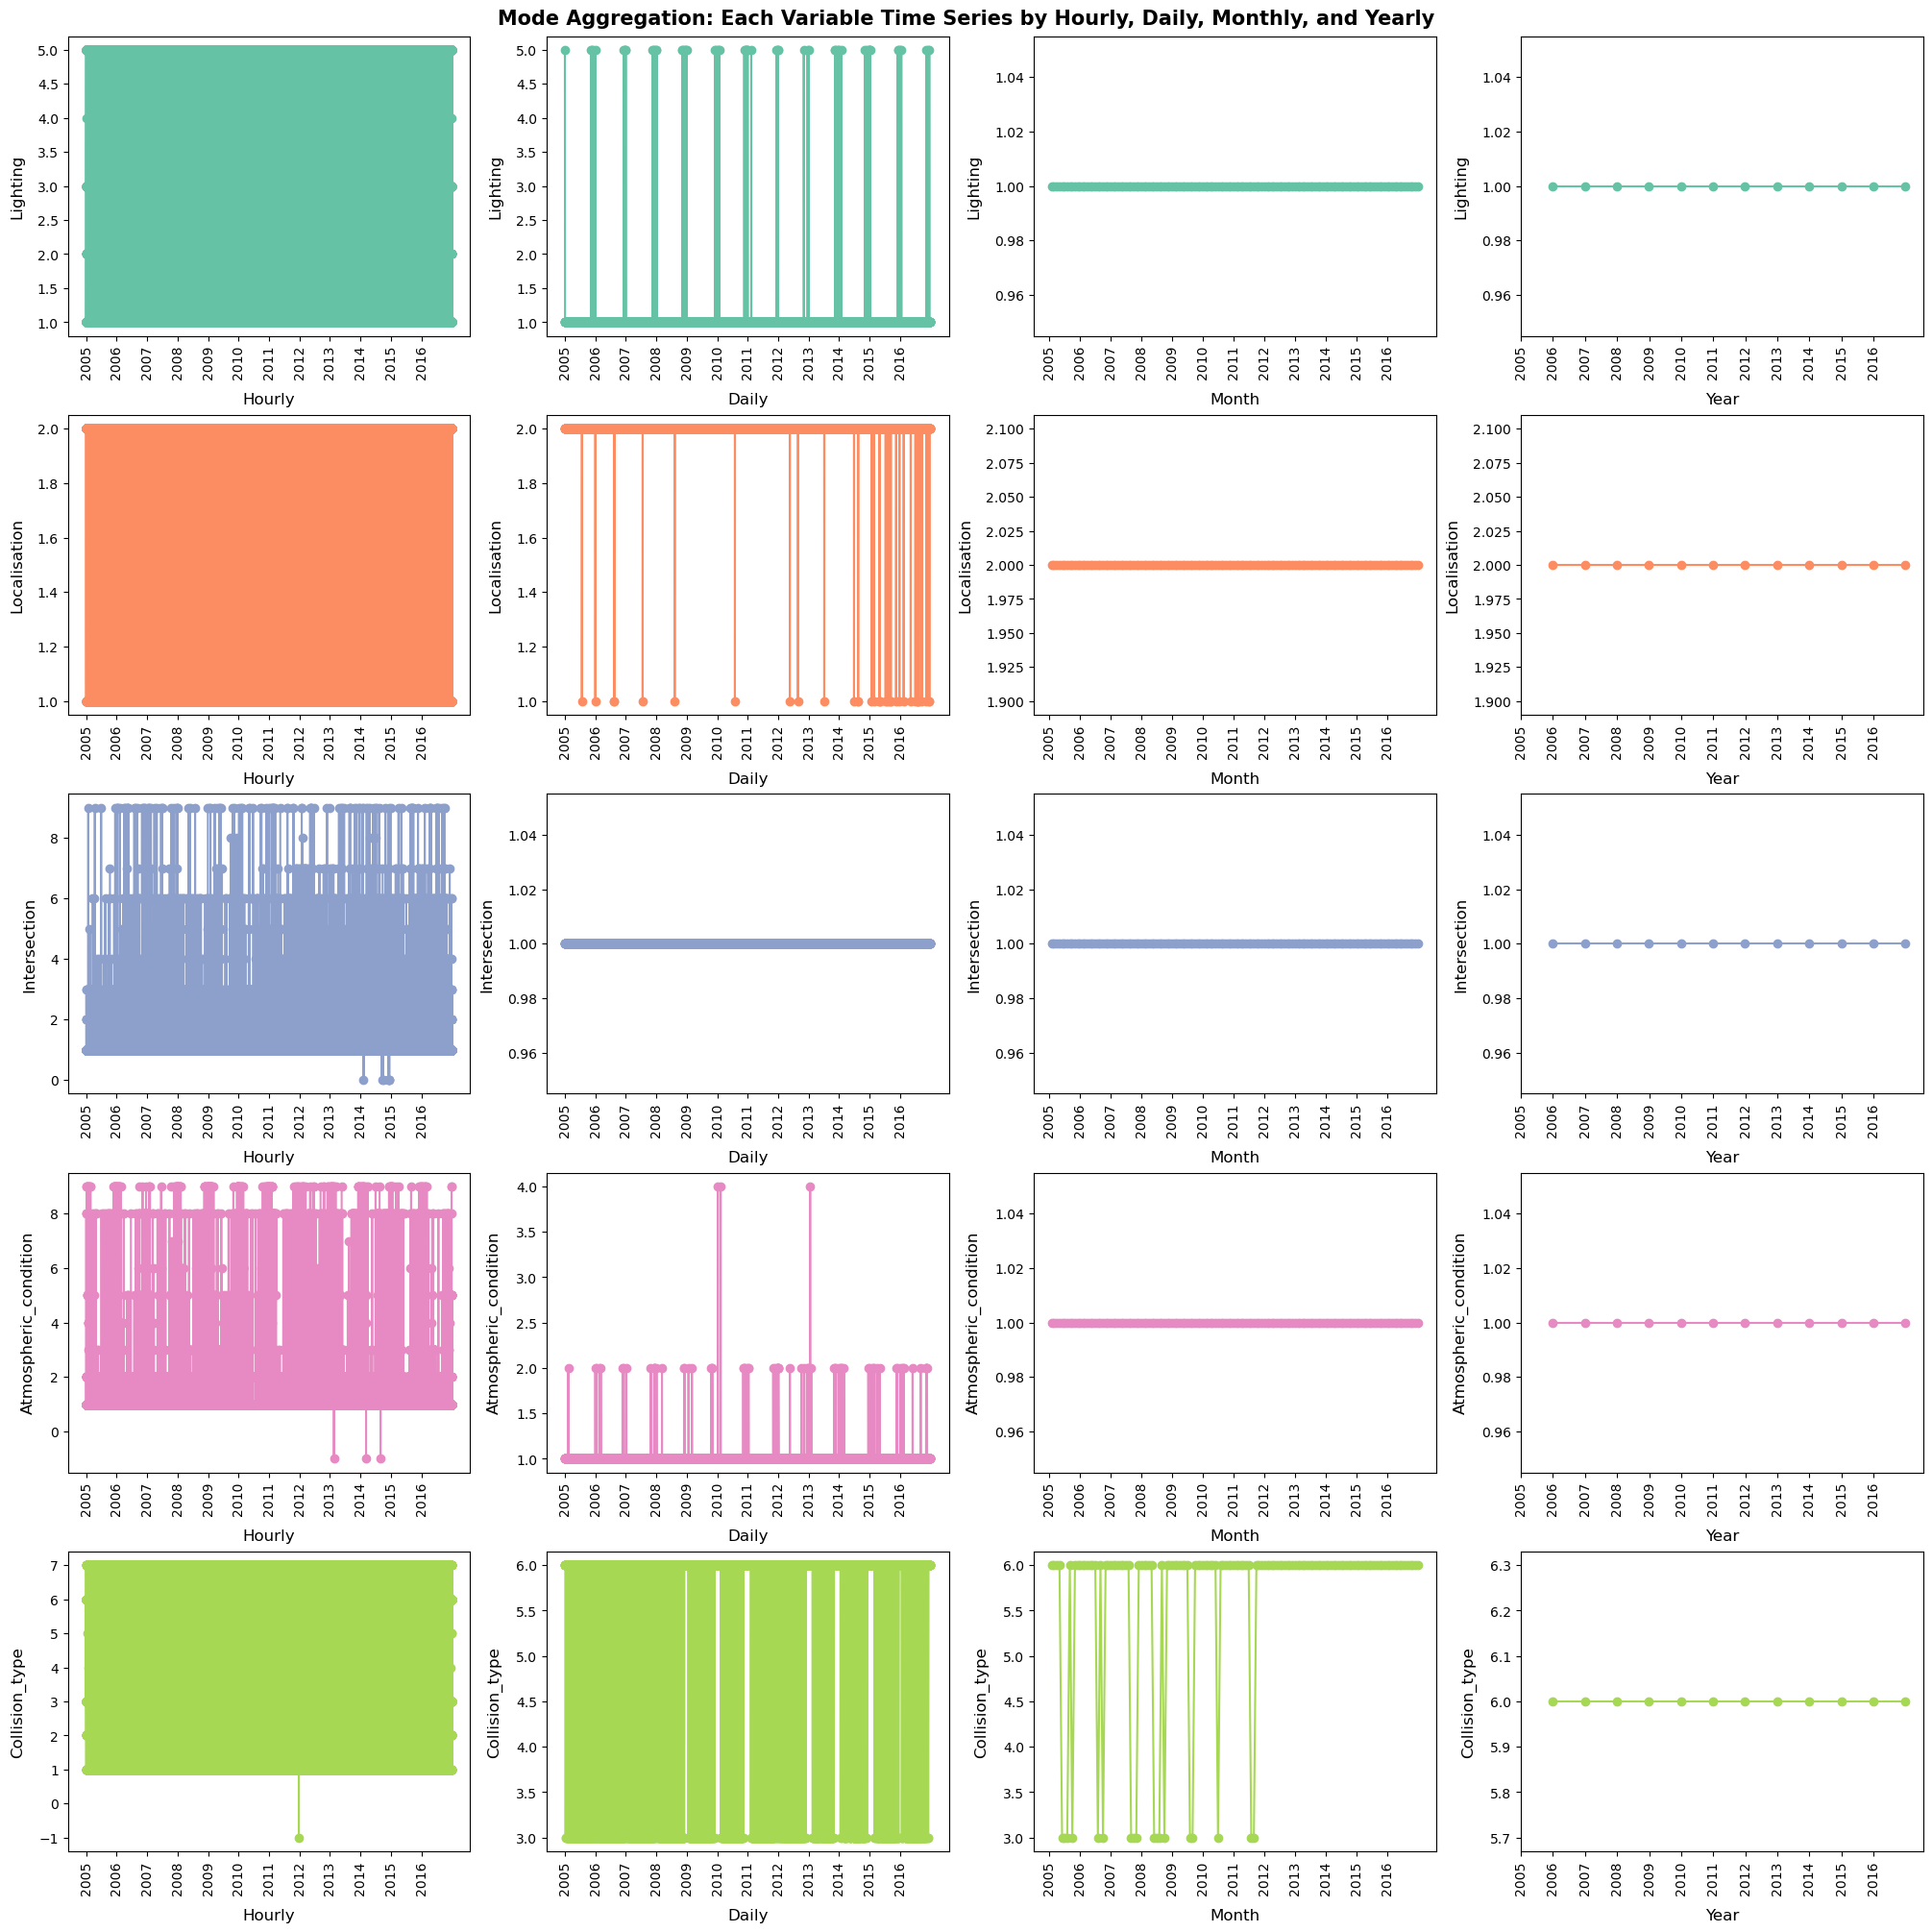

In [150]:
df_copy = df.copy()
df_copy.set_index('timestamp', inplace=True)

condition_list = ["lighting", "localisation", "intersection", "atmospheric_condition", "collision_type"]
len_l = len(condition_list)

hourly = df_copy.resample('H').apply(lambda df: df.mode().iloc[0] if not df.mode().empty else np.nan)
daily = df_copy.resample('D').apply(lambda df: df.mode().iloc[0] if not df.mode().empty else np.nan)
monthly = df_copy.resample('M').apply(lambda df: df.mode().iloc[0] if not df.mode().empty else np.nan)
yearly = df_copy.resample('Y').apply(lambda df: df.mode().iloc[0] if not df.mode().empty else np.nan)

ymdh_var_plt(yearly, monthly, daily, hourly,"Mode Aggregation: Each Variable Time Series by Hourly, Daily, Monthly, and Yearly",condition_list)

#### Insight of **Mode** Aggregation

| Variable              | Pattern              | Mode |
|:----------------------|:---------------------|:-----|
| lighting              | Seasonal (Daily plot)| 1    |
| localisation          | None                 | 2    |
| intersection          | None                 | 1    |
| atmospheric_condition | None                 | 1    |
| collision_type        | None                 | 6    |

```
From above plots, it was found that there were some patterns and trends for some variables. From now on, the variables are analyzed in the same way as numerical and ordinal timeseries data so that later I can use them to predict the number of accidents and variables.
```

### Box-and-Whisker Plot, Heatmap, ACF, PACF, and Seasonal Plots for Each Aggregation Method 

In [151]:
def cram_visualization(monthly,title,condition_list):
    fig = plt.figure(constrained_layout=True, figsize=(20,60))
    gs = gridspec.GridSpec(7*5, 2, figure=fig)
    fs= 25

    fig.suptitle(title, fontsize=fs, fontweight='bold')
    
    for i, cnd in enumerate(condition_list):
        j = i*7
        ax0 = fig.add_subplot(gs[j, 0:2])
        ax1 = fig.add_subplot(gs[j+1, 0])
        ax2 = fig.add_subplot(gs[j+1, 1])
        ax3 = fig.add_subplot(gs[j+2, 0])
        ax4 = fig.add_subplot(gs[j+2, 1])
        ax5 = fig.add_subplot(gs[j+3:j+5, 0:2])
        ax6 = fig.add_subplot(gs[j+5:j+7, 0],polar=True)
        ax7 = fig.add_subplot(gs[j+5:j+7, 1])

        ax0.text(0.5, 0.5, "----------{}----------".format(cnd.capitalize()), fontsize=25, ha='center', va='center', fontweight='bold')
        ax0.axis('off')
    
        sns.boxplot(data=monthly, x="year", y=cnd, ax=ax1);
        ax1.set_title("Box-and-Whisker Plot for {}".format(cnd.capitalize()))
        
        # heat map
        cnd_month_year = monthly.groupby(["year", "month"])[cnd].mean().reset_index()
        cnd_month_year = cnd_month_year.pivot(index="year", columns="month", values=cnd)
        
        sns.heatmap(cnd_month_year, cbar_kws={"label": cnd}, ax=ax2)
        ax2.set_title(f"{cnd.capitalize()} Condition Over Time")
        ax2.set_xlabel("Month")
        ax2.set_ylabel("Year")
        
        plot_acf(monthly[cnd], lags=24, ax=ax3) 
        ax3.set_xlabel('Lags (1 lag = 1 month)')
        ax3.set_ylabel('Autocorrelation')
        ax3.set_title('Autocorrelation Plot {}'.format(cnd.capitalize()))
        ax3.set_ylim([-0.2,1])
        
        plot_pacf(monthly[cnd], lags=24, ax=ax4)  # Change lags according to your data
        ax4.set_xlabel('Lags (1 lag = 1 month)')
        ax4.set_ylabel('Partical Autocorrelation')
        ax4.set_title('Partial Autocorrelation Function (PACF) for {}'.format(cnd.capitalize()))
        ax4.grid(True)
        ax4.set_ylim([-0.5,1])
        
        sns.lineplot(data=monthly, x='day', y=cnd, hue='year', palette='coolwarm', ax=ax5)
        ax5.set(xlabel='Day of Year', ylabel=cnd.capitalize())
        ax5.set_title('Seasonal Line Plot for {}'.format(cnd.capitalize()))
        ax5.grid()
        ax5.legend(title='Year')
        
        
        cm = plt.get_cmap('viridis')
        for (i, p) in enumerate(monthly['year'].unique()):
            color = cm(i / len(monthly['year'].unique()))
            values = monthly[monthly['year'] == p][cnd]
            angles = np.linspace(0, 2 * np.pi, len(values), endpoint=False)
            values = np.concatenate((values, [values[0]]))  # Close the plot
            angles = np.concatenate((angles, [angles[0]]))  # Close the plot
            ax6.plot(angles, values, label=str(p), color=color)
        
        month_angles = np.linspace(0, 2 * np.pi, 12, endpoint=False)
        month_names = [calendar.month_abbr[i+1] for i in range(12)]
        ax6.set_xticks(month_angles)
        ax6.set_xticklabels(month_names)
        ax6.set_rlabel_position(90)
        ax6.set_rticks([])
        ax6.set_rmax(monthly[cnd].max())
        ax6.set_title('Polar Seasonal for {}'.format(cnd.capitalize()))
        ax6.legend(title='Year', bbox_to_anchor=(1.05, 1), loc='upper left')
        
        sm.graphics.tsa.month_plot(monthly[cnd], ax=ax7)
        ax7.set(xlabel='Month', ylabel=cnd)
        ax7.set_title('Seasonal Subseries Plot for {}'.format(cnd.capitalize()))
        ax7.grid()

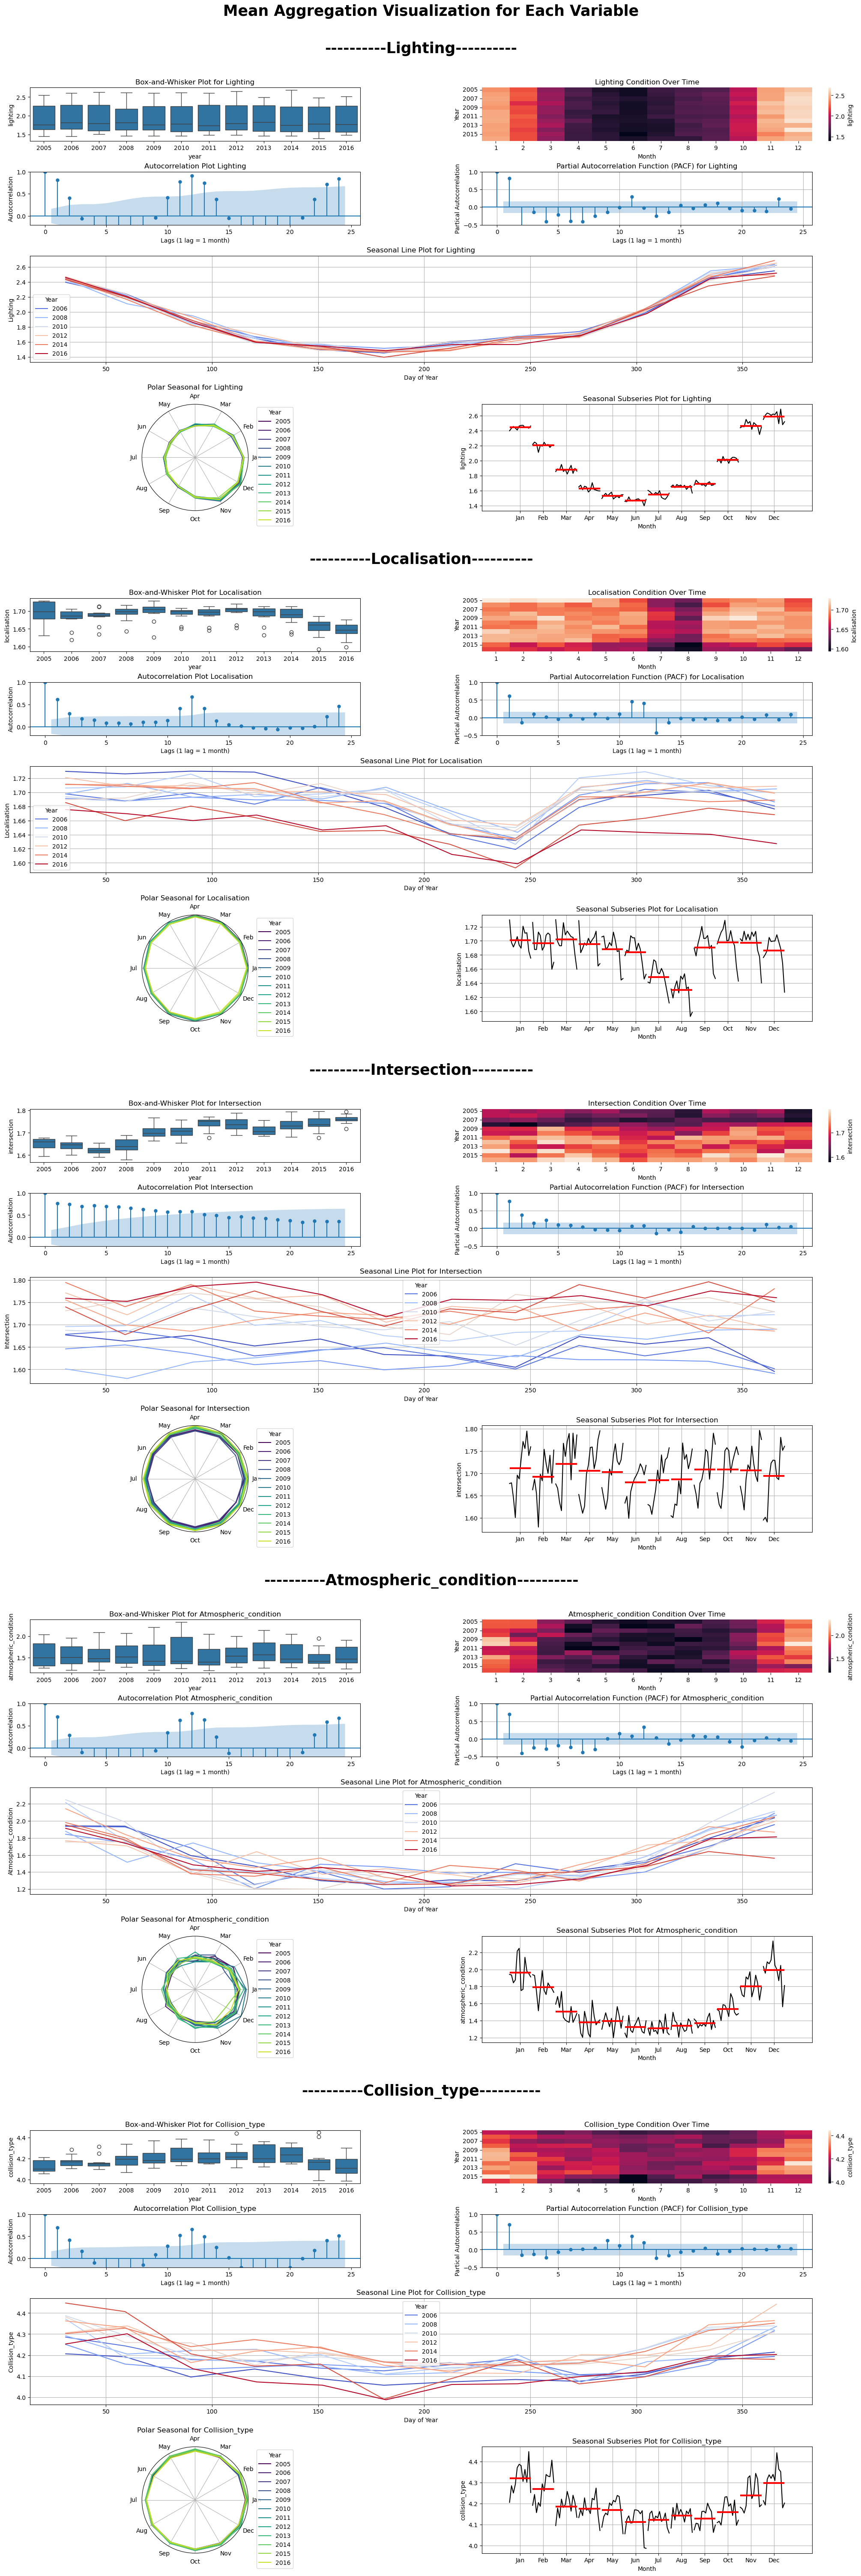

In [152]:
df_copy = df.copy()
df_copy.set_index('timestamp', inplace=True)

condition_list = ["lighting", "localisation", "intersection", "atmospheric_condition", "collision_type"]

monthly = df_copy.resample('M').mean()
monthly['year'] = monthly.index.year
monthly['month'] = monthly.index.month
monthly['day'] = monthly.index.dayofyear

cram_visualization(monthly, "Mean Aggregation Visualization for Each Variable", condition_list)

#### Insgiht of Mean Aggregation


| Variable             | Box-and-Whisker Plot                                                    | Heatmap                                                          | Autocorrelation Plot                                   | Partial Autocorrelation Plot                                            | Seasonal Line Plot                               | Polar Seasonal Plot                                              | Seasonal Subseries Plot                                                                 |
|----------------------|-------------------------------------------------------------------------|------------------------------------------------------------------|--------------------------------------------------------|------------------------------------------------------------------------|--------------------------------------------------|-------------------------------------------------------------------|------------------------------------------------------------------------------------------|
| lighting             | Mean values don’t change much                                           | Lower values from March to October — suggests seasonality        | Sinusoidal pattern — suggests seasonality              | Strong correlation with previous two time points                      | Sinusoidal shape — suggests seasonality           | Higher values from November to February — suggests seasonality    | Sinusoidal pattern — stable values within each month                                    |
| localisation         | IQR varies by month; many outliers and a decreasing trend               | Lower values in July and August — suggests seasonality           | Sinusoidal pattern — suggests seasonality              | Strong correlation with previous month and 11–13 months prior         | Drop around days 180–250 — suggests seasonality   | Slight decreasing trend                                          | Lower values in July and August; drop at end of month                                  |
| intersection         | Increasing trend                                                        | Increasing trend                                                 | Past 12 months show correlation, but resembles random walk          | Strong correlation with values 1–2 months prior; others near zero     | Increasing trend                                 | Increasing trend                                                 | Monthly increasing pattern — no clear seasonal pattern                                   |
| atmospheric_condition| No major changes over years                                             | Lower values from March to October — suggests seasonality        | Sinusoidal pattern — suggests seasonality              | Some correlation up to 8 months prior                                 | Sinusoidal shape — suggests seasonality           | Higher values from November to February — suggests seasonality    | Lower values from March to October — sinusoidal monthly pattern, suggests seasonality   |
| collision_type       | No clear pattern; 2006, 2007, and 2012 have small IQRs                  | Slightly decreasing from March to October — suggests seasonality | Sinusoidal pattern — suggests seasonality              | Some correlation with previous value                                  | Slightly unclear sinusoidal shape — suggests seasonality | Slight increasing trend                                        | Sinusoidal pattern — suggests seasonality                                             |


#### Summary
| Variable             | Seasonality         | Trend               |
|----------------------|---------------------|---------------------|
| lighting             | Present              | No clear trend      |
| localisation         | Present              | Decreasing trend    |
| intersection         | Not present          | Increasing trend    |
| atmospheric_condition| Present              | No clear trend      |
| collision_type       | Weak seasonality     | No clear trend      |



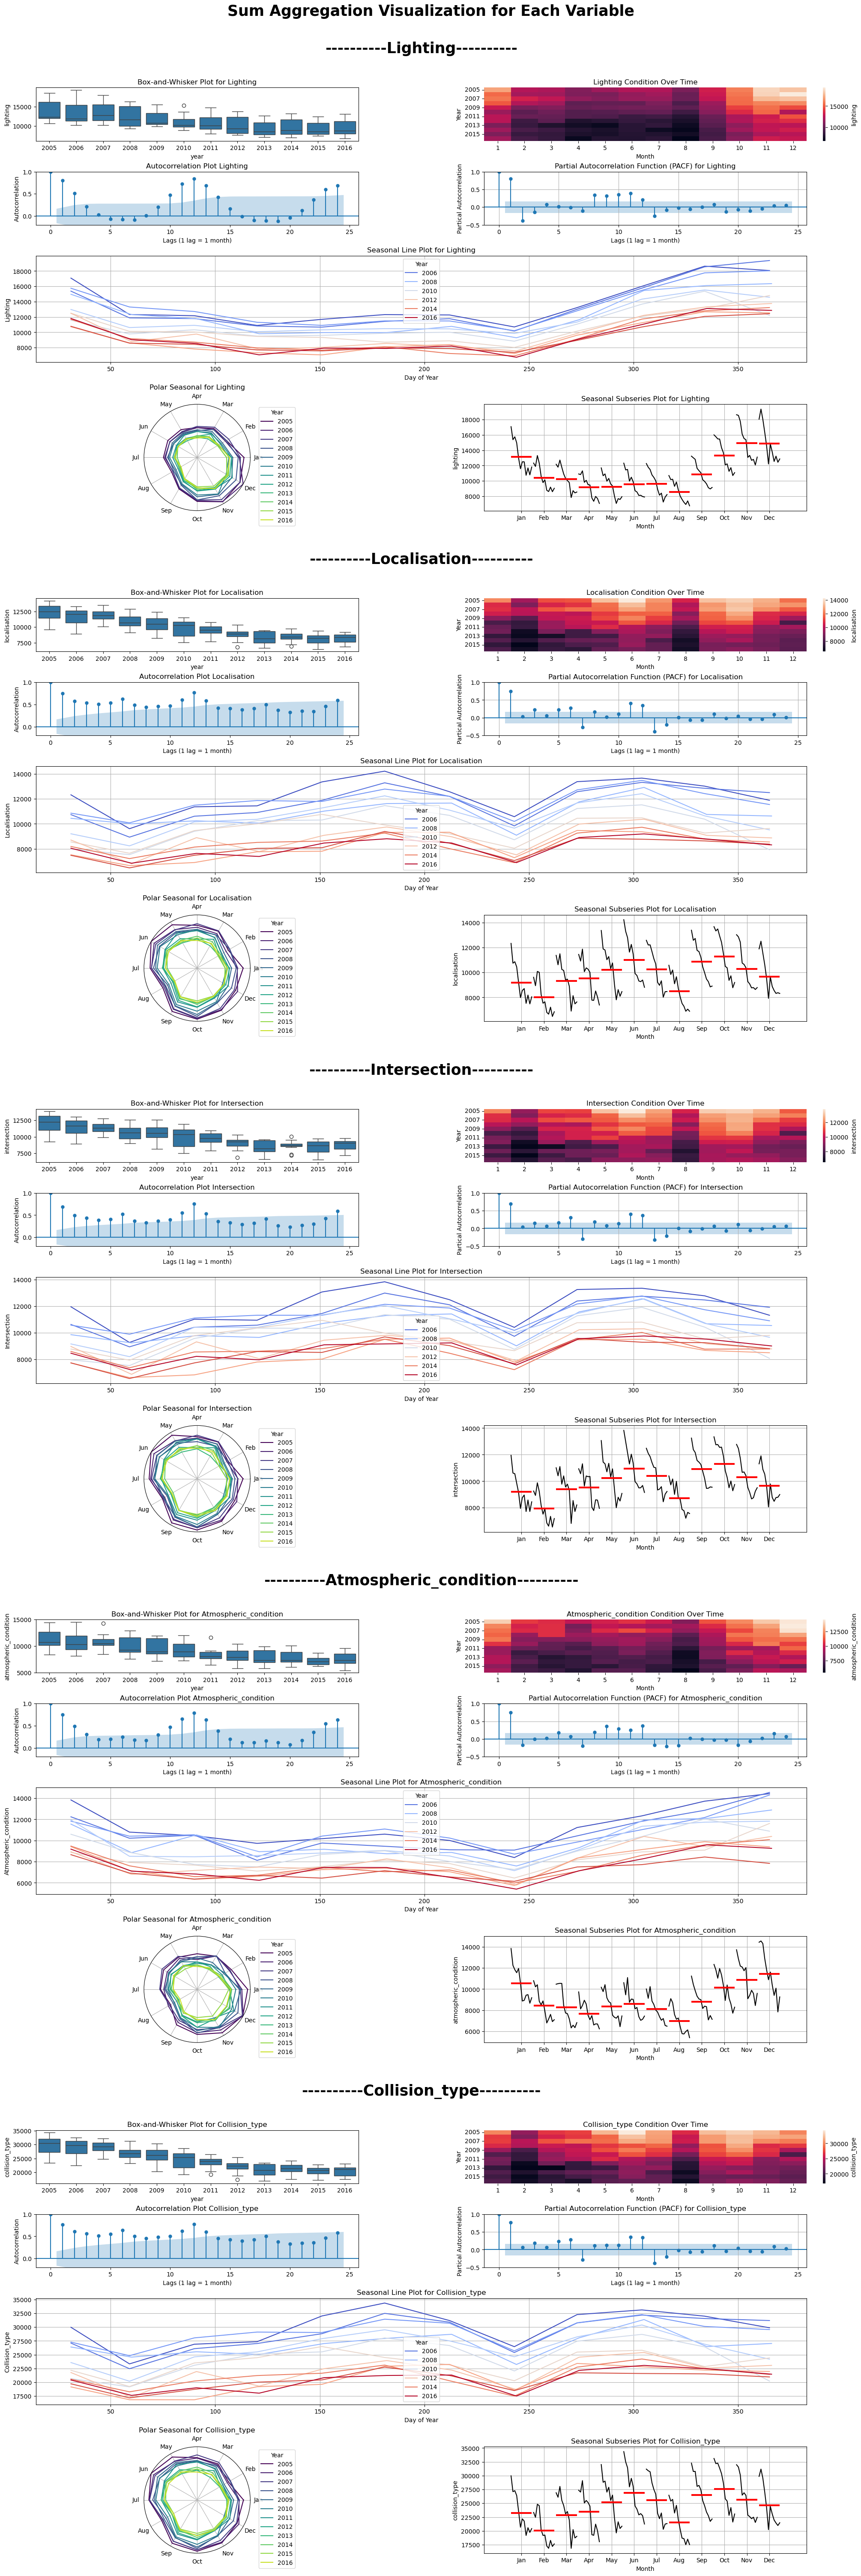

In [153]:
df_copy = df.copy()
df_copy.set_index('timestamp', inplace=True)

condition_list = ["lighting", "localisation", "intersection", "atmospheric_condition", "collision_type"]

monthly = df_copy.resample('M').sum()
monthly['year'] = monthly.index.year
monthly['month'] = monthly.index.month
monthly['day'] = monthly.index.dayofyear

cram_visualization(monthly, "Sum Aggregation Visualization for Each Variable", condition_list)

#### Insight of Mean Aggregation

| Variable             | Box-and-Whisker Plot                                        | Heatmap                                                       | Autocorrelation Plot                              | Partial Autocorrelation Plot                   | Seasonal Line Plot                                        | Polar Seasonal Plot                                              | Seasonal Subseries Plot                                                   |
|----------------------|-------------------------------------------------------------|----------------------------------------------------------------|----------------------------------------------------|------------------------------------------------|-------------------------------------------------------------|--------------------------------------------------------------------------|------------------------------------------------------------------------------|
| lighting             | Decreasing trend                                            | Lower values from February to September — suggests seasonality | Strong sinusoidal pattern — suggests seasonality  | Strong correlation with previous point        | Sinusoidal shape — suggests seasonality                      | Higher values from November to December — suggests seasonality            | Sinusoidal pattern — decreasing pattern within each month                  |
| localisation         | Decreasing trend                                            | Lower values in February and August — suggests seasonality and decreasing trend | Sinusoidal pattern — suggests seasonality          | Strong correlation with previous month        | Sinusoidal pattern — suggests seasonality and decreasing trend            | Lower values in February and August — suggests seasonality and decreasing trend | Lower values in February and August — seasonal pattern and decreasing within each month |
| intersection         | Decreasing trend                                            | Lower values in February and August — suggests seasonality and decreasing trend | Sinusoidal pattern — suggests seasonality          | Strong correlation with previous month        | Sinusoidal pattern — suggests seasonality and decreasing trend            | Lower values in February and August — suggests seasonality and decreasing trend | Monthly increase — no clear seasonal pattern                              |
| atmospheric_condition| Decreasing trend                                            | Lower values from February to September — suggests seasonality | Sinusoidal pattern — suggests seasonality          | Strong correlation with previous month        | Sinusoidal shape — suggests seasonality and decreasing trend             | Higher values from November to January — suggests seasonality             | Lower values from February to September — seasonal pattern and decreasing within each month |
| collision            | Decreasing trend                                            | Lower values in February and August — suggests seasonality     | Sinusoidal pattern — suggests seasonality          | Strong correlation with previous value         | Sinusoidal shape — suggests seasonality and decreasing trend             | Lower values in February and August — suggests seasonality                | Lower values in February and August — seasonal pattern and decreasing within each month |



#### Summary
| Variable             | Seasonality         | Trend               |
|----------------------|---------------------|---------------------|
| lighting             | Present              | Decreasing trend    |
| localisation         | Present              | Decreasing trend    |
| intersection         | Present              | Decreasing trend    |
| atmospheric_condition| Present              | Decreasing trend    |
| collision_type       | Present              | Decreasing trend    |


/Users/ikutatouma/anaconda3/envs/timeseries/lib/python3.9/site-packages/statsmodels/tsa/stattools.py:702: RuntimeWarning: invalid value encountered in divide
  acf = avf[: nlags + 1] / avf[0]
/Users/ikutatouma/anaconda3/envs/timeseries/lib/python3.9/site-packages/statsmodels/regression/linear_model.py:1490: ValueWarning: Matrix is singular. Using pinv.
  warnings.warn("Matrix is singular. Using pinv.", ValueWarning)
/Users/ikutatouma/anaconda3/envs/timeseries/lib/python3.9/site-packages/statsmodels/tsa/stattools.py:702: RuntimeWarning: invalid value encountered in divide
  acf = avf[: nlags + 1] / avf[0]
/Users/ikutatouma/anaconda3/envs/timeseries/lib/python3.9/site-packages/statsmodels/regression/linear_model.py:1490: ValueWarning: Matrix is singular. Using pinv.
  warnings.warn("Matrix is singular. Using pinv.", ValueWarning)
/Users/ikutatouma/anaconda3/envs/timeseries/lib/python3.9/site-packages/statsmodels/tsa/stattools.py:702: RuntimeWarning: invalid value encountered in divide
  

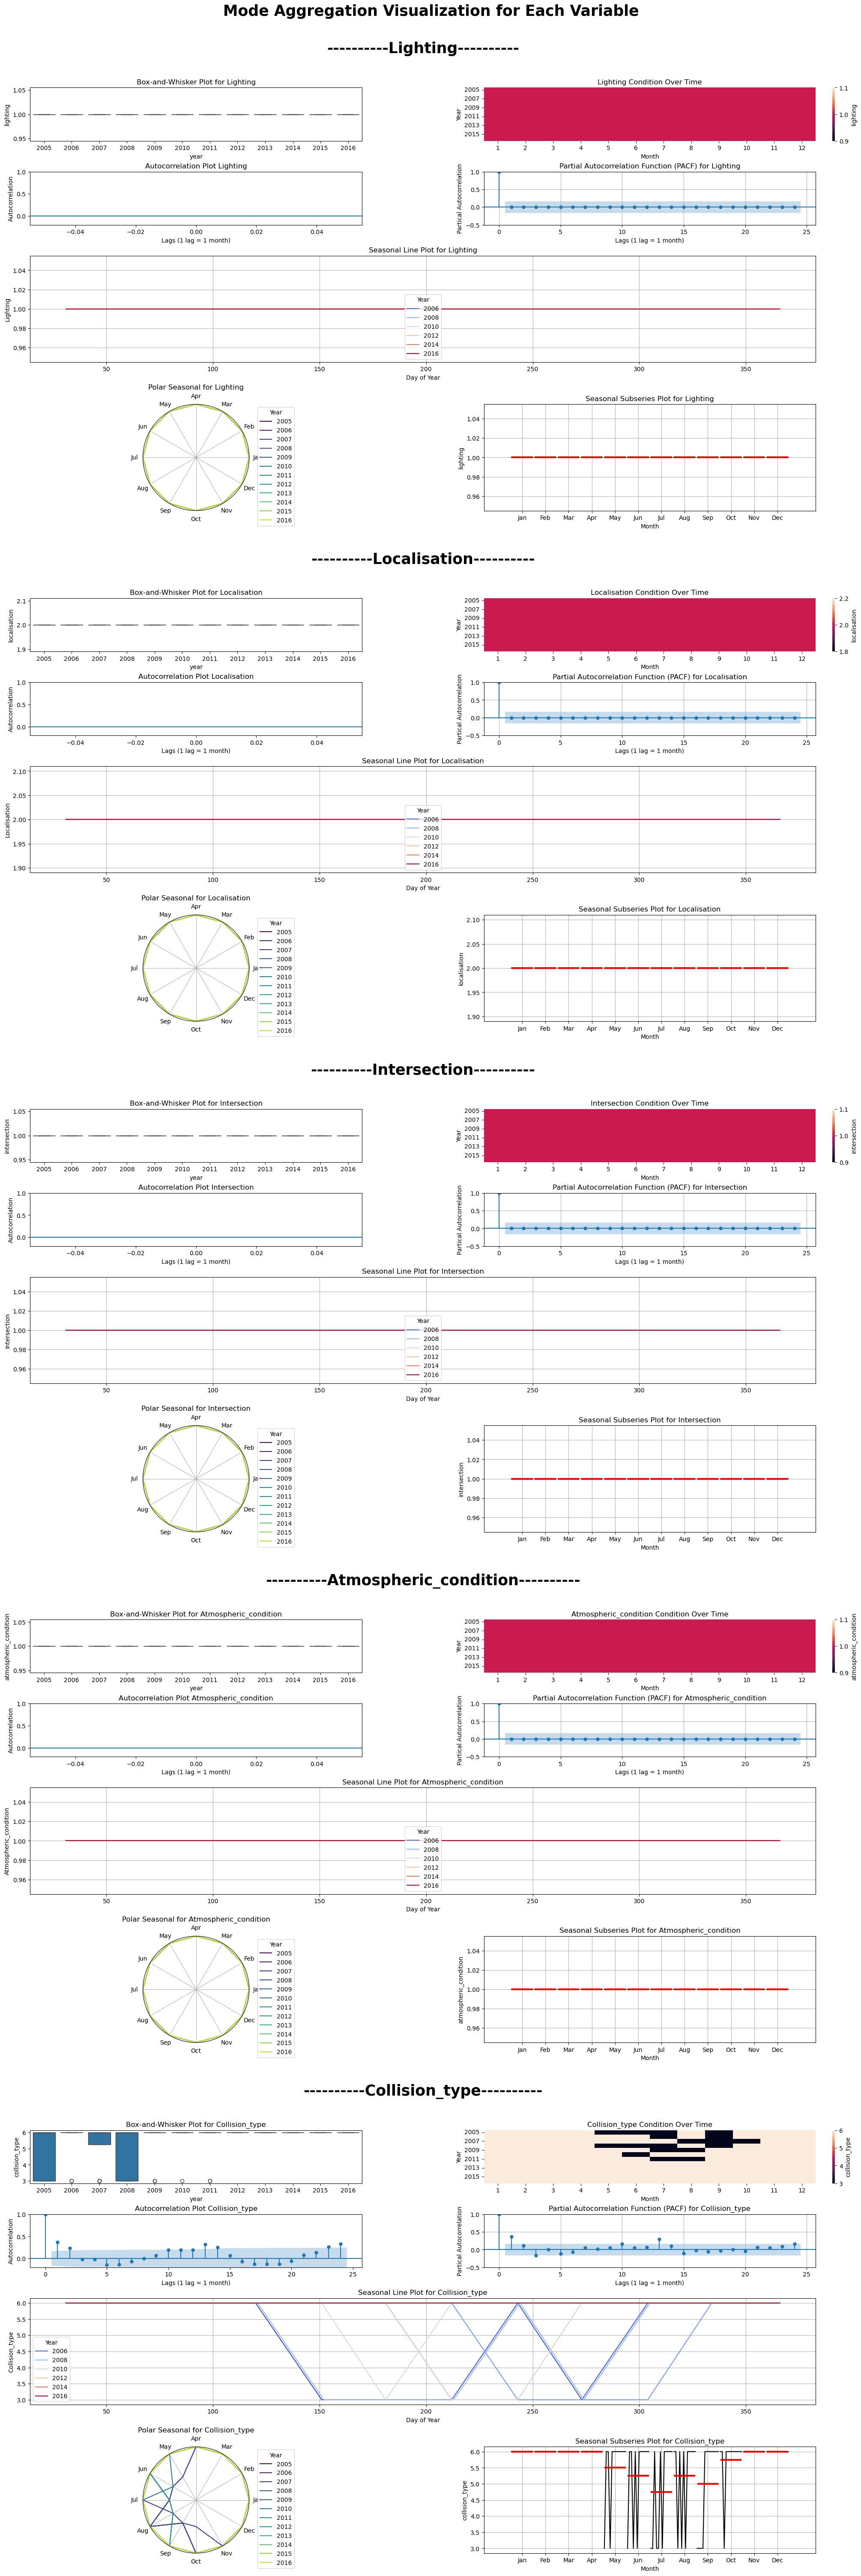

In [154]:
df_copy = df.copy()
df_copy.set_index('timestamp', inplace=True)
warnings.filterwarnings("ignore", category=UserWarning)

condition_list = ["lighting", "localisation", "intersection", "atmospheric_condition", "collision_type"]

monthly = df_copy.resample('M').apply(lambda df: df.mode().iloc[0] if not df.mode().empty else np.nan)
monthly['year'] = monthly.index.year
monthly['month'] = monthly.index.month
monthly['day'] = monthly.index.dayofyear

cram_visualization(monthly, "Mode Aggregation Visualization for Each Variable", condition_list)

#### Insight of Mode Aggregation

| Variable              | Box-and-Whisker Plot                                   | Heatmap                                                       | Autocorrelation Plot                             | Partial Autocorrelation Plot                     | Seasonal Line Plot                                   | Polar Seasonal Plot                                           | Seasonal Subseries Plot                                                        |
|-----------------------|--------------------------------------------------------|----------------------------------------------------------------|---------------------------------------------------|----------------------------------------------------|----------------------------------------------------|----------------------------------------------------------------|---------------------------------------------------------------------------------|
| lighting              | Always at mode 1                                       | Always at mode 1                                               | No correlation                                    | No correlation                                     | Always at mode 1                                  | Always at mode 1                                               | Always at mode 1                                                                |
| localisation          | Always at mode 2                                       | Always at mode 2                                               | No correlation                                    | No correlation                                     | Always at mode 2                                  | Always at mode 2                                               | Always at mode 2                                                                |
| intersection          | Always at mode 1                                       | Always at mode 1                                               | No correlation                                    | No correlation                                     | Always at mode 1                                  | Always at mode 1                                               | Always at mode 1                                                                |
| atmospheric_condition | Always at mode 1                                       | Always at mode 1                                               | No correlation                                    | No correlation                                     | Always at mode 1                                  | Always at mode 1                                               | Always at mode 1                                                                |
| collision_type        | Mode 6 dominant from 2009                              | Mode 3 appears April–November; mode 6 dominates from 2011      | Slight sinusoidal pattern — very weak seasonality | Almost no correlation                              | Mode 3 appears around days 150–310                | Only mode 6 from December to April                       | Mode 3 appears April–October — average drops during this period                |

---

#### Summary of Mode Aggregation

| Variable              | Seasonality     | Trend         |
|-----------------------|------------------|---------------|
| lighting              | No               | No            |
| localisation          | No               | No            |
| intersection          | No               | No            |
| atmospheric_condition | No               | No            |
| collision_type        | Weak/unclear     | Unclear       |


### Correlation and Confusion Matrix

Correlation and its confusion matrix shows linear relationship between variables.

However, the data is categorical and nominal.

Peason correlation must be applied to continuous data, and the data must be expressed in a scale, not nominal.

Peason correlation mustn't be used for this data.

The results are meaningless but in category distribution at the diagonal.

Each category distirbution seems to be highly imbalance.


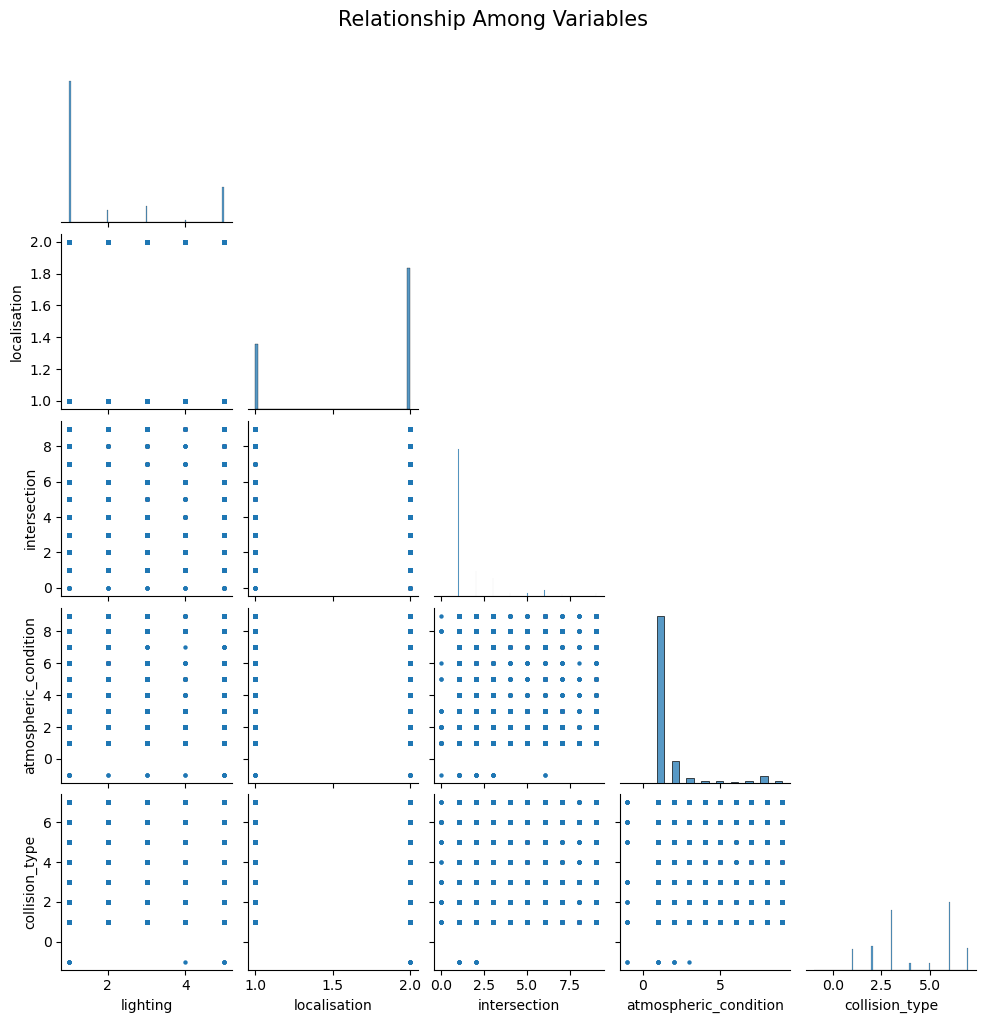

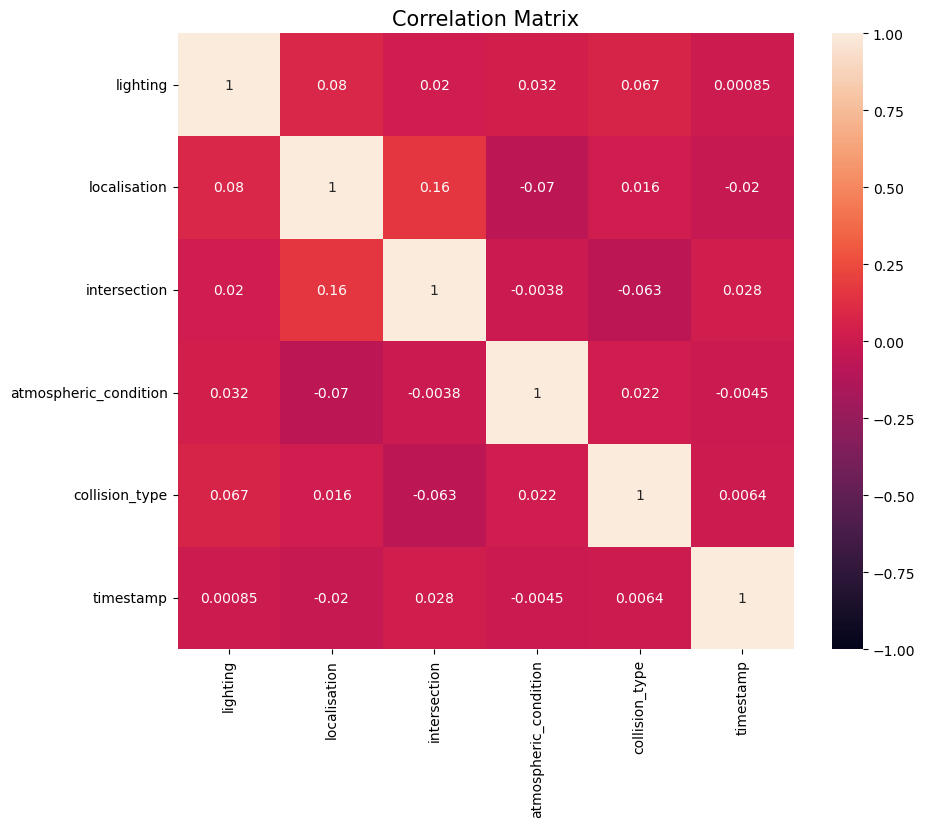

In [155]:
copy_df = df.copy()
copy_df.drop(columns=['accident_id'], inplace=True)

corr = copy_df.corr()

sns.pairplot(copy_df, plot_kws=dict(linewidth=0, s=10), corner=True, height=2)
plt.suptitle("Relationship Among Variables", y=1.02, fontsize=15)

plt.figure(figsize=(10, 8))
sns.heatmap(corr, vmin=-1.0, vmax=1.0, square=True, annot=True)
plt.title("Correlation Matrix", fontsize=15)

plt.show()

### Analyze the Most Influential Variables on Accident Occurrence by Random Forest

Since above methods cannot capture the relationships, random forest is adopted.

By making many decision tree and comparing the results, random forest can capture the feature importance.

In addition, since its tree property, catogorical data is available.

--------------------------------------
Most important feature: collision_type
--------------------------------------
                 Feature  Importance
4         collision_type    0.346900
1           localisation    0.231139
2           intersection    0.224861
0               lighting    0.116249
3  atmospheric_condition    0.080851


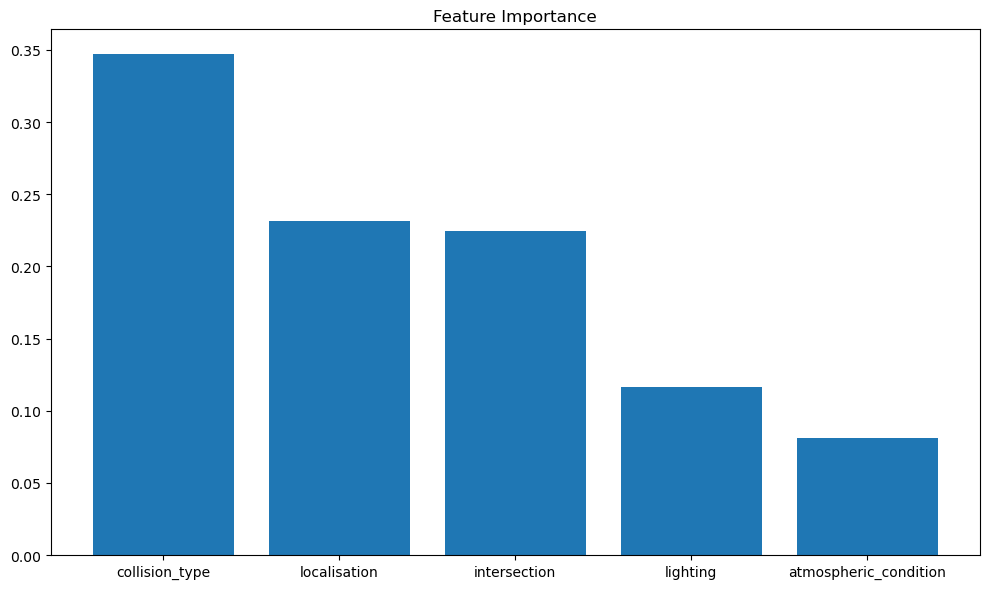

In [156]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import OneHotEncoder

copy_df = df.copy()
copy_df['date'] = copy_df['timestamp'].dt.date
daily_counts = copy_df.groupby('date').size().reset_index(name='accident_count')
copy_df['hour'] = copy_df['timestamp'].dt.hour
copy_df['dayofweek'] = copy_df['timestamp'].dt.dayofweek
copy_df['month'] = copy_df['timestamp'].dt.month
agg = copy_df.groupby(['date', 'lighting', 'localisation', 'intersection',
                  'atmospheric_condition', 'collision_type']).size().reset_index(name='accident_count')
X = agg.drop(columns=['date', 'accident_count'])
y = agg['accident_count']

X_encoded = pd.get_dummies(X)  # one-hot encoding for categorical variables

model = RandomForestRegressor(random_state=42)
model.fit(X_encoded, y)

importances = model.feature_importances_
indices = np.argsort(importances)[::-1]
features = X_encoded.columns
most_important_feature = X_encoded.columns[np.argmax(importances)]
print("--------------------------------------")
print("Most important feature:", most_important_feature)
print("--------------------------------------")

importances = model.feature_importances_
feature_names = X_encoded.columns


feature_importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
})


feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)
print(feature_importance_df.head())

# Plot
plt.figure(figsize=(10, 6))
plt.title("Feature Importance")
plt.bar(range(len(features)), importances[indices])
plt.xticks(range(len(features)), features[indices])
plt.tight_layout()
plt.show()

The result shows collision_type is the most influential variable with 0.34, and achieved one of the reseach question.

**What variable is the most influential to the car accident** => **collision_type**

### Check Correlation Between Variables


#### Instead of linear correlation, 
- A count plot is used to show the label distribution.
- Cramér's V is used to measure the correlation between categorical variables.

Count plot counts number of occurences for each nominal for each variable and capture the relationship for categorical and nominal data.

Cramer's V calculates the association between two nominal variables.


#### The results show
- Due to the class imbalance, the count plots do not provide meaningful insights.
- All correlations are low, indicating that the variables do not appear to influence each other.

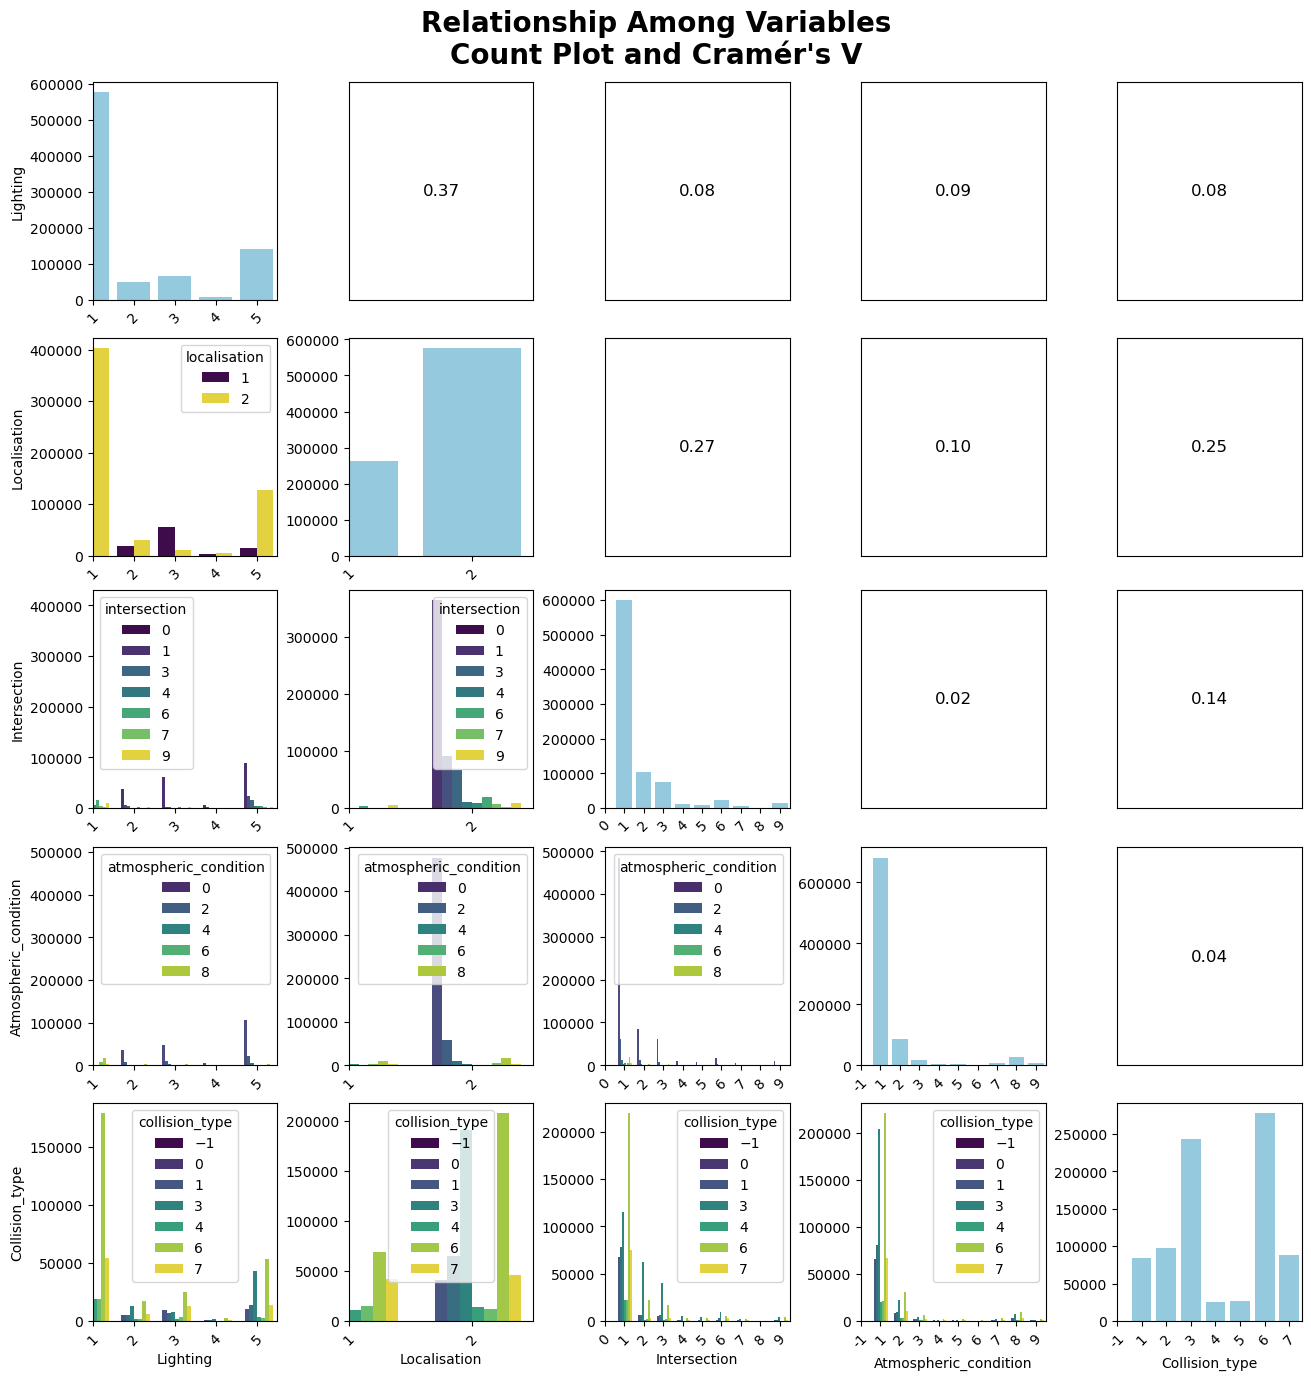

In [157]:
def cramers_v(confusion_matrix):
    chi2 = chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2 / n
    r, k = confusion_matrix.shape
    return np.sqrt(phi2 / min(k - 1, r - 1))


condition_list = ["lighting", "localisation", "intersection", "atmospheric_condition", "collision_type"]


n = len(condition_list)
cramers_results = pd.DataFrame(np.zeros((n, n)), index=condition_list, columns=condition_list)

for i in range(n):
    for j in range(n):
        cm = pd.crosstab(df[condition_list[i]], df[condition_list[j]])
        cramers_results.iloc[i, j] = cramers_v(cm)


condition_list = ["lighting", "localisation", "intersection", "atmospheric_condition", "collision_type"]
len_l = len(condition_list)

fig, ax = plt.subplots(len_l, len_l, layout='constrained', figsize=(13, 13))
fig.suptitle("Relationship Among Variables\nCount Plot and Cramér's V", fontsize=20, fontweight='bold', y=1.05)

for i, c1 in enumerate(condition_list):
    for j, c2 in enumerate(condition_list):
        ax_ij = ax[i][j]
        
        if j > i:
            value = cramers_results.iloc[i, j]
            ax_ij.text(0.5, 0.5, f"{value:.2f}", fontsize=12, ha='center', va='center')
            ax_ij.set_xticks([])
            ax_ij.set_yticks([])
            ax_ij.set_xlim(0, 1)
            ax_ij.set_ylim(0, 1)
            ax_ij.spines['top'].set_visible(True)
            ax_ij.spines['bottom'].set_visible(True)
            ax_ij.spines['left'].set_visible(True)
            ax_ij.spines['right'].set_visible(True)
            continue
        
        if i == j:
            sns.countplot(data=df, x=c1, ax=ax_ij, color='skyblue')
        else:
            sns.countplot(data=df, x=c2, hue=c1, ax=ax_ij, palette="viridis")

        ax_ij.set_xlim(left=0)
        ax_ij.tick_params(axis='x', rotation=45)

        if i == len_l - 1:
            ax_ij.set_xlabel(c2.capitalize())
        else:
            ax_ij.set_xlabel("")

        if j == 0:
            ax_ij.set_ylabel(c1.capitalize())
        else:
            ax_ij.set_ylabel("")

# 4. Model Selection and Fitting

## Comparison Among Seasonal Naïve Method, Holt-Winters Seasonal Smoothing, and SARIMA Model

Since a seasonal pattern is present, models capable of handling seasonality are selected.

Error is measured by
- RMSE
- MAE
- PMAE

information criteria is calcualted by 
- AIC
- BIC

In [306]:
def csv_update(data, file_path, index_column):
    if data.index.name != index_column:
        raise ValueError(f"Index must be named '{index_column}'")

    if os.path.exists(file_path):
        existing = pd.read_csv(file_path, index_col=index_column)
        existing = existing[~existing.index.isin(data.index)]
        updated = pd.concat([existing, data])
    else:
        updated = data
    updated.to_csv(file_path, index=True, index_label=index_column)


Testing steps: 12 months
             RMSE         MAE      MAPE          AIC          BIC
Model                                                            
SN     225.664205  175.500000  0.036116          NaN          NaN
HW     307.300098  256.225072  0.053602  1545.371151  1591.495982
SA     345.956175  306.257063  0.062876  1724.852453  1738.748070

---Best Models by Metric:---
Lowest RMSE: SN
Lowest MAE: SN
Lowest MAPE: SN
Lowest AIC: HW
Lowest BIC: HW



Testing steps: 36 months
             RMSE         MAE      MAPE          AIC          BIC
Model                                                            
SN     729.541846  601.194444  0.121962          NaN          NaN
HW     690.230013  622.275841  0.129090  1270.710547  1313.624647
SA     678.727174  610.803433  0.126276  1388.648989  1401.418374

---Best Models by Metric:---
Lowest RMSE: SA
Lowest MAE: SN
Lowest MAPE: SN
Lowest AIC: HW
Lowest BIC: HW



Testing steps: 60 months
              RMSE          MAE      MAPE    

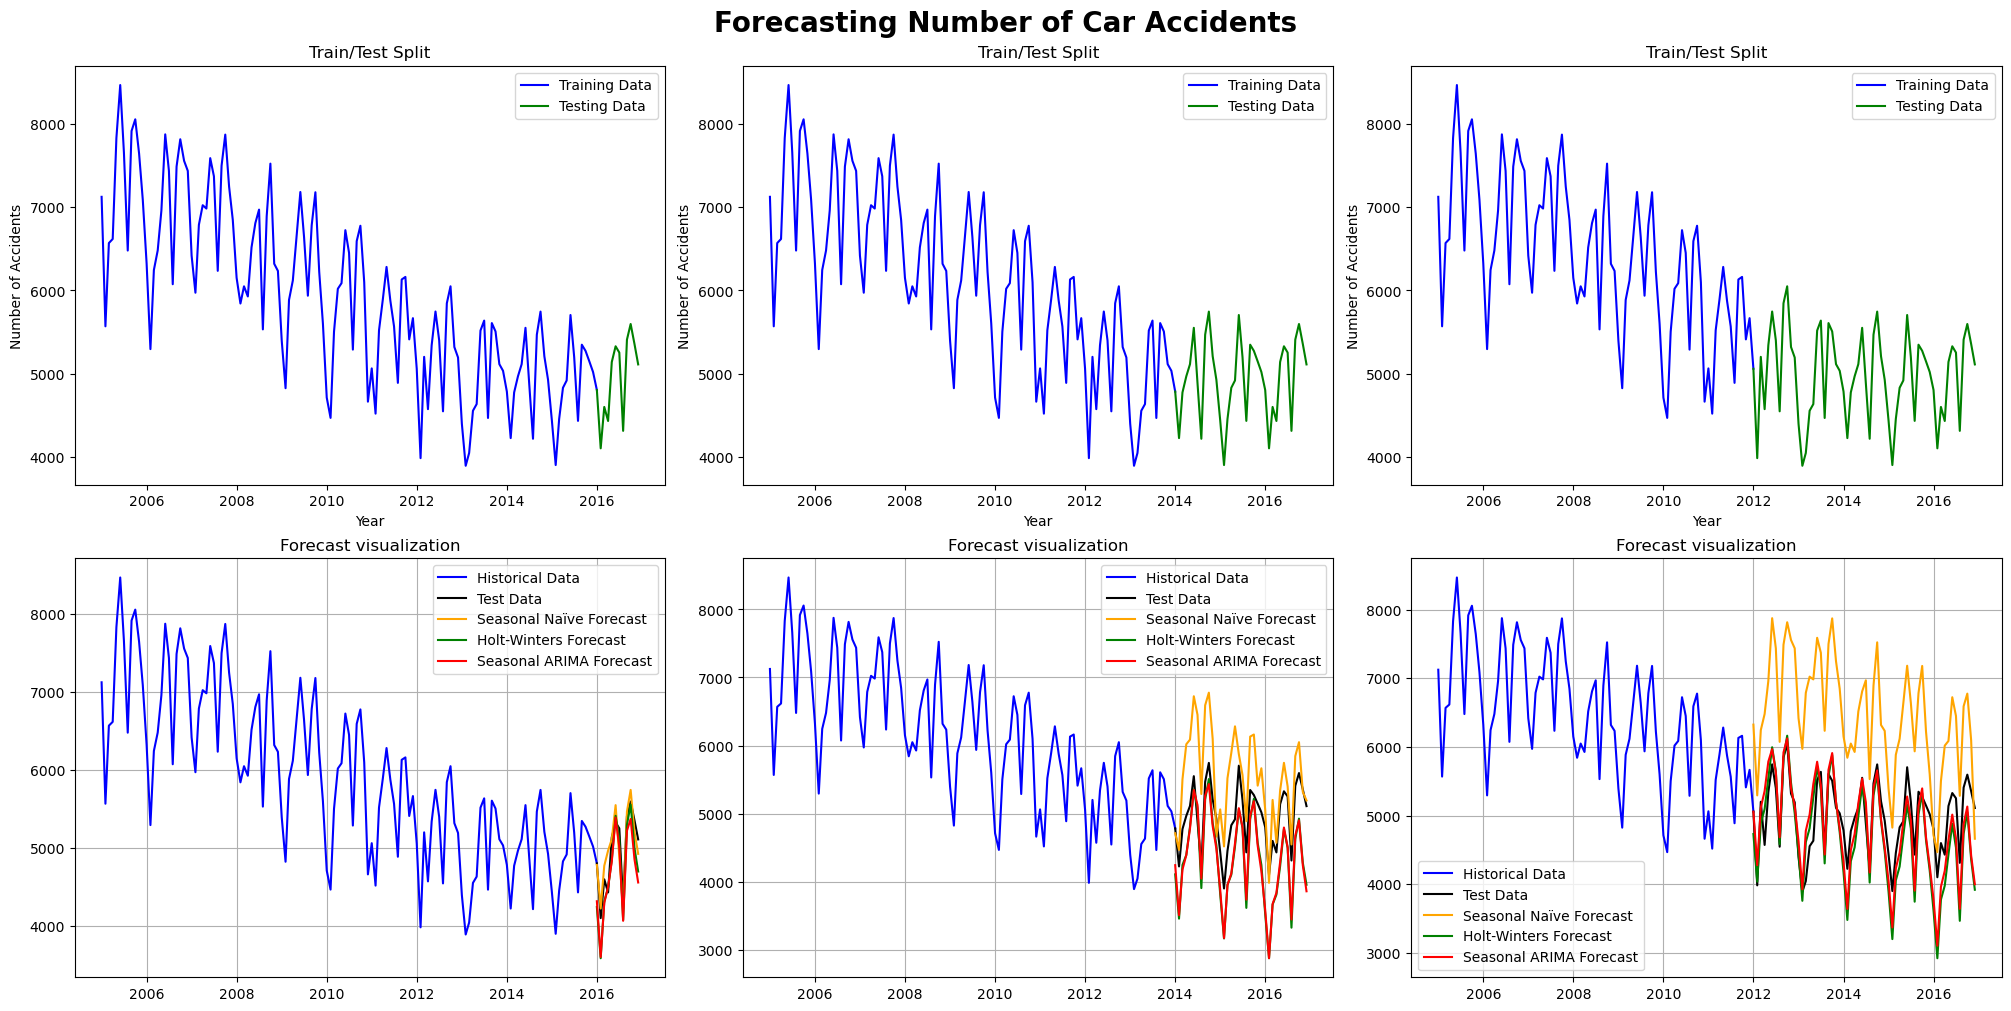

In [314]:
def predict(h, df_ym):
    # Seasonal Naïve Method
    sn_train = df_ym['accidents'][:-h]
    sn_test = df_ym['accidents'][-h:]
    
    m = 12
    k = int(np.floor(h / m))
    T = (len(sn_train)-1)
    
    sn_pred = []
    for i in range(1,h+1):
        sn_pred.append(sn_train[T+i-m*(k+1)])
    
    m = 12
    hws_train = df_ym['accidents'][:-h]
    hws_test = df_ym['accidents'][-h:]
    
    # Holt-Winters model
    HW_model = ExponentialSmoothing(hws_train,
                                    trend='additive',
                                    seasonal='additive',
                                    seasonal_periods=m)
    
    HW_model_fit = HW_model.fit()
    HW_pred = list(HW_model_fit.forecast(h).values)
    
    # SARIMA model
    sa_train = df_ym['accidents'][:-h]
    sa_test = df_ym['accidents'][-h:]
    sarima_model = sm.tsa.SARIMAX(sa_train, order=(1,1,1),seasonal_order=(1,1,1,12))
    
    SA_model_fit = sarima_model.fit(method='powell',disp=False)
    
    SA_pred = list(SA_model_fit.forecast(h).values)
    
    return sn_train, sn_test,hws_test, sa_test, sn_pred, HW_pred, SA_pred, HW_model_fit, SA_model_fit


fig, ax = plt.subplots(2,3,figsize=(20, 10), layout='constrained')
fig.suptitle("Forecasting Number of Car Accidents" , fontsize=20, fontweight='bold')
h = 12

for i in range(3):

    df_ymd = df_ymd.copy()
    df_ym = df_ymd.groupby([df_ymd.index.year, df_ymd.index.month]).sum()
    df_ym.index = pd.to_datetime(df_ym.index.map(lambda x: f"{x[0]}-{x[1]:02d}"))
  
    sn_train, sn_test,hws_test, sa_test, sn_pred, HW_pred, SA_pred, HW_model_fit, SA_model_fit = predict(h, df_ym)
    extended_train_values = np.append(sn_train.values, sn_test.values[0])
    extended_train_index = sn_train.index.append(pd.DatetimeIndex([sn_test.index[0]]))

    
    ax[0][i].plot(extended_train_index, extended_train_values, color='blue', label='Training Data')
    ax[0][i].plot(sn_test.index, sn_test.values, color='green', label='Testing Data')
    ax[0][i].set_xlabel('Year')
    ax[0][i].set_ylabel('Number of Accidents')
    ax[0][i].set_title('Train/Test Split')
    ax[0][i].legend()

    ax[1][i].plot(df_ym.index[:-h+1], df_ym['accidents'][:-h+1], label='Historical Data', color='Blue')
    ax[1][i].plot(df_ym.index[-h:], df_ym['accidents'][-h:], label='Test Data', color='black')
    ax[1][i].plot(df_ym.index[-h:], sn_pred, label='Seasonal Naïve Forecast', color='orange')
    ax[1][i].plot(df_ym.index[-h:], HW_pred, label='Holt-Winters Forecast', color='green')
    ax[1][i].plot(df_ym.index[-h:], SA_pred, label='Seasonal ARIMA Forecast',  color='red')
    ax[1][i].legend()
    ax[1][i].set_title('Forecast visualization')
    ax[1][i].grid(True)

    metrics_df = pd.DataFrame({
    'RMSE': [
        np.sqrt(mean_squared_error(sn_test, sn_pred)),
        np.sqrt(mean_squared_error(hws_test, HW_pred)),
        np.sqrt(mean_squared_error(sa_test, SA_pred))
    ],
    'MAE': [
        mean_absolute_error(sn_test, sn_pred),
        mean_absolute_error(hws_test, HW_pred),
        mean_absolute_error(sa_test, SA_pred)
    ],
    'MAPE': [
        mean_absolute_percentage_error(sn_test, sn_pred),
        mean_absolute_percentage_error(hws_test, HW_pred),
        mean_absolute_percentage_error(sa_test, SA_pred)
    ],
    'AIC': [
        None,
        HW_model_fit.aic,
        SA_model_fit.aic
    ],
    'BIC': [
        None,
        HW_model_fit.bic,
        SA_model_fit.bic
    ]
    }, index=['SN', 'HW', 'SA'])

    
    best_models = {
    metric: metrics_df[metric].dropna().idxmin()
    for metric in metrics_df.columns
    }

    metrics_df.index.name = "Model"

    csv_update(metrics_df, "evaluate.csv", "Model")

    print(f"Testing steps: {h} months")
    print(metrics_df)

    print("\n---Best Models by Metric:---")
    for metric, model in best_models.items():
        print(f"Lowest {metric}: {model}")
    print("\n\n")
  
    h+=24

#### Results
- For a small testing size (12 months), the Seasonal Naive method yields the lowest error among the three models.

- For a medium testing size (36 months), the Seasonal ARIMA method shows the lowest error.

- For a large testing size (60 months), the Seasonal ARIMA method shows the lowest error.

#### Summary
- Since the goal is to forecast the number of accidents five years ahead, the Seasonal ARIMA method is currently the most appropriate choice.

## MLP, CNN, and RNN models

In [308]:
import tensorflow as tf
from IPython.display import Image
from keras.layers import Dense, Input, Concatenate
from keras.callbacks import EarlyStopping
from keras.models import Sequential, Model
from keras.optimizers import Adam
from keras.utils import plot_model

In [309]:
def split_sequences(data, 
                    n_steps_in=1, 
                    n_steps_out=1, 
                    stride_in=1, 
                    x_features=None,
                    y_features=None,
                    start_index=0,
                    y_offset=0):
    
    # Convert pandas DataFrame to NumPy array
    if hasattr(data, 'values'):
        data_n = data.values

    T, n_features = data_n.shape
    max_start = T - (n_steps_in + y_offset + n_steps_out) + 1
    start = min(max(start_index, 0), max_start - 1)
    starts = list(range(start, max_start, stride_in))

    X, y = [], []
    for i in starts:
        seq_x = data_n[i : i + n_steps_in, :]
        y_start = i + n_steps_in + y_offset
        y_end = y_start + n_steps_out
        seq_y = data_n[y_start : y_end, :]

        if x_features is not None:
            seq_x = seq_x[:, x_features]
        if y_features is not None:
            seq_y = seq_y[:, y_features]

        X.append(seq_x)
        y.append(seq_y)

    X = np.stack(X)
    y = np.stack(y)

    print(f"X shape: {X.shape}")
    print(f"- {X.shape[0]} samples")
    print(f"- {X.shape[1]} steps")
    print(f"- {X.shape[2]} features with {list(data.columns[x_features])}")
    print("-----------------------")
    print(f"y shape: {y.shape}")
    print(f"- {y.shape[0]} samples")
    print(f"- {y.shape[1]} steps")
    print(f"- {y.shape[2]} features with {list(data.columns[y_features])}")    
    print("-----------------------")
    return X, y


def train_val_test_split(seq_X, seq_y):
    X_train, X_temp, y_train, y_temp = train_test_split( # split data into train and others
        seq_X, seq_y, test_size=0.4, random_state=42
    )
    
    X_val, X_test, y_val, y_test = train_test_split( # split "others" into val and test => Train:Val:Test = 6:2:2
        X_temp, y_temp, test_size=0.5, random_state=42
    )

    return X_train, X_val, X_test, y_train, y_val, y_test
    

In [369]:
def plot_feature_errors(y_true_dict, y_pred_dict, feature_names=None):
    sets = ['train', 'val', 'test']
    y_true = {k: np.array(v) for k, v in y_true_dict.items()}
    y_pred = {k: np.array(v) for k, v in y_pred_dict.items()}

    _, _, n_features = y_true['train'].shape
    if feature_names is None:
        feature_names = [f"Feature {i}" for i in range(n_features)]

    for f in range(n_features):
        plt.figure(figsize=(15, 4))
        for i, k in enumerate(sets):
            y_t = y_true[k][:, :, f].squeeze()
            y_p = y_pred[k][:, :, f].squeeze()

            plt.subplot(1, 3, i + 1)
            plt.plot(y_t, label='Actual', alpha=0.7)
            plt.plot(y_p, label='Predicted', alpha=0.7)
            plt.title(f'{k.capitalize()} Set — {feature_names[f]}')
            plt.xlabel('Sample')
            plt.ylabel('Value')
            plt.legend()
        plt.tight_layout()
        plt.show()
        
def predict_evaluate(model, model_name, history, X_train, X_val, X_test, y_train, y_val, y_test, feature_names):
    y_train_pred = model.predict(X_train)
    y_val_pred = model.predict(X_val)
    y_test_pred = model.predict(X_test)

    plt.figure(figsize=(10, 5))
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title(f'{model_name} Validation Loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'], loc='upper right')
    plt.show()

    plot_feature_errors(
        y_true_dict={'train': y_train, 'val': y_val, 'test': y_test},
        y_pred_dict={'train': y_train_pred, 'val': y_val_pred, 'test': y_test_pred},
        feature_names=feature_names
    )

    new_error_data = pd.DataFrame({
        "RMSE": np.sqrt(mean_squared_error(y_test.reshape(-1), y_test_pred.reshape(-1))),
        "MAE" : mean_absolute_error(y_test.reshape(-1), y_test_pred.reshape(-1)),
        "MAPE": mean_absolute_percentage_error(y_test.reshape(-1), y_test_pred.reshape(-1))
    }, index=[model_name])

    
    
    new_error_data.index.name="Model"
    csv_update(new_error_data, "evaluate.csv", "Model")
    
    print(f"Error Metrics for {model_name}----------------------")
    print(f"RMSE: {new_error_data.loc[model_name, 'RMSE']:.4f}")
    print(f"MAE : {new_error_data.loc[model_name, 'MAE']:.4f}")
    print(f"MAPE: {new_error_data.loc[model_name, 'MAPE']:.4f}")
    print("-----------------------------------------------------")
    

In [381]:
def record_properties(model_name,model_type, agg_type, epochs, batch_size, learning_rate, n_steps_in, n_steps_out, stride_in, x_features, y_features, y_offset, start_index):
    model_properties = pd.DataFrame({
            "model_type": model_type,
            "aggregation_type": agg_type,
            "epochs" :epochs,
            "batch_size":batch_size,
            "learning_rate":learning_rate,
            "n_steps_in":n_steps_in,
            "n_steps_out":n_steps_out,
            "stride_in":stride_in,
            "x_features":x_features,
            "y_features":y_features,
            "y_offset":y_offset,
            "start_index":start_index
        }, index=[model_name]);
    model_properties.index.name = "Model"
    csv_update(model_properties,"model_properties.csv", "Model")

In [388]:
def train_evaluate(model,model_name, model_type, agg_type=None, data=None, epochs=200, batch_size=32, learning_rate=0.001, n_steps_in=1, n_steps_out=1, stride_in=1, x_features=None, y_features=None, y_offset=0, start_index=0):
    print(f"-------------Training: {model_name}-------------")
    record_properties(model_name,model_type, agg_type,epochs, batch_size, learning_rate, n_steps_in, n_steps_out, stride_in, x_features, y_features, y_offset, start_index)
    seq_X, seq_y = split_sequences(data, n_steps_in, n_steps_out, stride_in, x_features, y_features, start_index, y_offset)

    X_train, X_val, X_test, y_train, y_val, y_test = train_val_test_split(seq_X, seq_y)
    
    model = model(model_name, n_steps_in,x_features, n_steps_out, y_features)
    plot_model(model, to_file=f'img/{model_name}.png', show_shapes=True, show_layer_names=True)

    optimizer = Adam(learning_rate=learning_rate)
    model.compile(optimizer=optimizer, loss='mse')
    history = model.fit(
        X_train, y_train,
        epochs=epochs,
        batch_size=batch_size,
        verbose=0,
        validation_data=(X_val, y_val),
        callbacks=[EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)]
    )

    predict_evaluate(model, model_name, history, X_train, X_val, X_test, y_train, y_val, y_test, feature_names=list(data.columns[y_features]))

In [389]:
def MLP(model_name, n_steps_in, x_features, n_steps_out, y_features):
    input_shape = (n_steps_in, len(x_features))
    output_units = n_steps_out * len(y_features)
    
    inputs = Input(shape=input_shape)
    x = Dense(100, activation='relu')(inputs)
    x = Dense(output_units)(x)
    
    if n_steps_out > 1 or len(y_features) > 1:
        outputs = Reshape((n_steps_out, len(y_features)))(x)
    else:
        outputs = x

    return Model(inputs=inputs, outputs=outputs, name=model_name)

def MLP(model_name, n_steps_in, x_features, n_steps_out, y_features, layers_config, multi_headed=False, heads_config=None):
    input_shape = (n_steps_in, len(x_features))
    inputs = Input(shape=input_shape)
    x = Flatten()(inputs)

    for nodes in layers_config:
        x = Dense(nodes, activation='relu')(x)

    if multi_headed:
        if heads_config is None:
            raise ValueError("heads_config must be provided if multi_headed=True")
        outputs = {}
        for head_name, config in heads_config.items():
            n_out = config['n_steps_out']
            y_feats = config['y_features']
            units = n_out * len(y_feats)
            head_out = Dense(units, name=f'{head_name}_dense')(x)
            if n_out > 1 or len(y_feats) > 1:
                head_out = Reshape((n_out, len(y_feats)), name=f'{head_name}_reshape')(head_out)
            outputs[head_name] = head_out
        model = Model(inputs=inputs, outputs=outputs, name=model_name)
    else:
        units = n_steps_out * len(y_features)
        x = Dense(units)(x)
        if n_steps_out > 1 or len(y_features) > 1:
            outputs = Reshape((n_steps_out, len(y_features)))(x)
        else:
            outputs = x
        model = Model(inputs=inputs, outputs=outputs, name=model_name)

    return model


In [390]:
df_copy = df.copy()
df_time = df_copy[['accident_id', 'timestamp']].set_index('timestamp').rename_axis(None, axis=0)
df_y = df_time.groupby([df_time.index.year]).size()
df_ym = df_time.groupby([df_time.index.year, df_time.index.month]).size()

df_copy = df.copy()
df_copy.set_index('timestamp', inplace=True)
yearly = df_copy.resample('Y').sum()
monthly = df_copy.resample('M').sum()

yearly.drop(columns=['accident_id'], inplace=True)
monthly.drop(columns=['accident_id'], inplace=True)

yearly["accidents"] = df_y.values
monthly["accidents"] = df_ym.values

In [391]:
# (model, model_name, data, epochs=200, batch_size=32, learning_rate=0.001, n_steps_in=1, n_steps_out=1, stride_in=1, x_features=None, y_features=None, y_offset=0):

train_evaluate(MLP, "univariate_MLP_1", "MLP", agg_type="Sum",
               data=yearly, n_steps_in=1, n_steps_out=1, 
               stride_in=1, x_features=[2, 5], y_features=[2, 5],
               y_offset=0,  batch_size=32, learning_rate=0.001, start_index=0)

-------------Training: univariate_MLP_1-------------


ValueError: Length of values (2) does not match length of index (1)

In [379]:
model_properties_df = pd.read_csv("model_properties.csv")
model_properties_df

Model model_type  epochs  batch_size  learning_rate  n_steps_in  \
0  univariate_MLP_1        MLP     200          32          0.001           1   

   n_steps_out  stride_in  x_features  y_features  y_offset  start_index  
0            1          1           5           5         0            0

In [380]:
evaluate_df = pd.read_csv("evaluate.csv")
evaluate_df

Model         RMSE          MAE      MAPE          AIC  \
0                SN  1591.205261  1498.150000  0.303758          NaN   
1                HW   511.376451   414.700232  0.085959   999.251741   
2                SA   449.633935   351.840651  0.073203  1047.236364   
3               MLP  2778.992377  2192.265625  0.028901          NaN   
4  univariate_MLP_1  2959.842229  2307.916667  0.030068          NaN   

           BIC  
0          NaN  
1  1038.144809  
2  1058.549764  
3          NaN  
4          NaN